In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="ET5vzMsPJyam3aJGDjJf")
project = rf.workspace("spondylothesis").project("spondy-bccix")
version = project.version(24)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to spondy-24 in yolov8:: 100%|██████████| 2481/2481 [00:00<00:00, 9428.33it/s]


In [1]:
from ultralytics import YOLO

model = YOLO("yolov8x-seg.pt")

model.train(data="/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/data.yaml", epochs=100, imgsz=640, batch=6)

New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 7967MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/data.yaml, epochs=100, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visua

E0000 00:00:1764403523.042224   40197 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764403523.046045   40197 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764403523.056396   40197 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764403523.056412   40197 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764403523.056415   40197 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764403523.056417   40197 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

train: Scanning /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/train/labels.cache... 985 images, 0 backgrounds, 0 corrupt: 100%|██████████| 985/985 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/home/yousof/anaconda3/envs/Works/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/valid/labels.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs/segment/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.000515625), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.84G     0.8768      1.449      1.412      1.153         12        640: 100%|██████████| 165/165 [01:27<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]

                   all        131        786      0.882      0.871      0.932      0.743      0.884      0.867      0.929      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.77G      0.777      1.189     0.9009      1.102         18        640: 100%|██████████| 165/165 [01:27<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]

                   all        131        786      0.818      0.857      0.881        0.7      0.818      0.857      0.879       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.79G     0.7747      1.125     0.8233      1.093         12        640: 100%|██████████| 165/165 [01:26<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]

                   all        131        786      0.886      0.901      0.944      0.763      0.885      0.899      0.941       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.79G     0.7887      1.145     0.7398      1.113          6        640: 100%|██████████| 165/165 [01:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]

                   all        131        786      0.837      0.859      0.894      0.729      0.835      0.856      0.886      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.79G     0.7608       1.08     0.6978       1.08         15        640: 100%|██████████| 165/165 [01:34<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        131        786      0.935      0.939      0.974      0.803       0.94      0.938      0.973      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.79G     0.7371       1.05      0.667      1.078         11        640: 100%|██████████| 165/165 [01:33<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.37it/s]

                   all        131        786      0.935      0.935      0.968      0.795      0.938      0.937      0.968      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.79G     0.7361      1.044     0.6241      1.075          5        640: 100%|██████████| 165/165 [01:33<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]

                   all        131        786      0.925      0.947      0.974      0.781      0.925      0.947      0.972      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.79G     0.7215      1.023     0.6172      1.065         14        640: 100%|██████████| 165/165 [01:35<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]

                   all        131        786      0.936      0.934      0.957      0.796      0.936      0.934      0.957      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.79G     0.7162      1.008     0.5817      1.061          5        640: 100%|██████████| 165/165 [01:35<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        131        786      0.929      0.943      0.975       0.79       0.93      0.944      0.975      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.79G      0.722      1.001     0.5896      1.069          4        640: 100%|██████████| 165/165 [01:31<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        131        786      0.971      0.936      0.985      0.807      0.971      0.936      0.982      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.79G     0.7023     0.9863     0.5621      1.055         19        640: 100%|██████████| 165/165 [01:34<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        131        786      0.945      0.952      0.981       0.81      0.948      0.955      0.982      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.79G     0.7006     0.9707     0.5623      1.054         15        640: 100%|██████████| 165/165 [01:34<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]

                   all        131        786      0.945      0.966      0.983      0.831      0.946      0.967      0.985      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.79G     0.6946     0.9674     0.5441      1.045         13        640: 100%|██████████| 165/165 [01:33<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]

                   all        131        786      0.954      0.967      0.981      0.816      0.953      0.964      0.977      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.79G     0.6972     0.9632     0.5159      1.044          6        640: 100%|██████████| 165/165 [01:29<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        131        786      0.962      0.972      0.986      0.822      0.965      0.975      0.986       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.79G     0.6892     0.9612     0.5146      1.049          6        640: 100%|██████████| 165/165 [01:34<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        131        786      0.942      0.953      0.982      0.819      0.942      0.953       0.98      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.79G     0.6801     0.9479      0.509      1.033         17        640: 100%|██████████| 165/165 [01:34<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        131        786      0.939      0.955       0.97      0.811      0.941      0.957      0.973      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.79G     0.6795     0.9486      0.497      1.037         15        640: 100%|██████████| 165/165 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        131        786      0.911      0.941      0.965      0.804      0.913      0.943      0.966      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.79G     0.6747     0.9338     0.4758      1.031         12        640: 100%|██████████| 165/165 [01:34<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        131        786      0.931      0.945      0.967      0.811      0.932      0.946      0.965      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.79G      0.672      0.943     0.4868      1.032         12        640: 100%|██████████| 165/165 [01:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]

                   all        131        786      0.962      0.959      0.985      0.832      0.966      0.957      0.984      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.79G     0.6707     0.9387      0.482      1.039         18        640: 100%|██████████| 165/165 [01:34<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]

                   all        131        786      0.934      0.952      0.977      0.829      0.938      0.956      0.979      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.79G     0.6747     0.9337     0.4759      1.035         11        640: 100%|██████████| 165/165 [01:34<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]

                   all        131        786      0.953      0.949       0.98       0.82      0.952      0.947      0.978      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.79G     0.6588     0.9216     0.4582      1.028         15        640: 100%|██████████| 165/165 [01:31<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]

                   all        131        786      0.931      0.978      0.986      0.827      0.942      0.968      0.987      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.79G     0.6659     0.9182     0.4569      1.034         16        640: 100%|██████████| 165/165 [01:32<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]

                   all        131        786      0.944      0.946      0.977      0.824      0.943      0.945      0.976      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.79G     0.6631     0.9084     0.4488      1.028         16        640: 100%|██████████| 165/165 [01:34<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]

                   all        131        786      0.967      0.946      0.979      0.825      0.967      0.946      0.979      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.79G     0.6575     0.9095     0.4256      1.013         18        640: 100%|██████████| 165/165 [01:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]

                   all        131        786       0.96      0.963      0.986      0.831      0.959      0.961      0.984      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.79G     0.6469     0.9069     0.4482       1.02         12        640: 100%|██████████| 165/165 [01:27<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.53it/s]

                   all        131        786      0.942      0.961      0.981      0.821      0.944      0.964      0.983      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.79G     0.6555     0.9041     0.4603      1.027         14        640: 100%|██████████| 165/165 [01:29<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]

                   all        131        786      0.954       0.95      0.971      0.828      0.955      0.951       0.97      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.79G     0.6502      0.921     0.4441      1.018          7        640: 100%|██████████| 165/165 [01:29<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]

                   all        131        786      0.962      0.972      0.983      0.825      0.962      0.972      0.983      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.79G     0.6408     0.8986     0.4591       1.01         11        640: 100%|██████████| 165/165 [01:29<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.36it/s]

                   all        131        786       0.95      0.936      0.974      0.823      0.953      0.938      0.975        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.79G     0.6463     0.9013     0.4195      1.016          5        640: 100%|██████████| 165/165 [01:27<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]

                   all        131        786      0.947      0.969      0.984      0.829      0.946      0.968      0.981       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.79G     0.6364     0.8964     0.4177      1.007         79        640:  61%|██████    | 101/165 [00:54<00:34,  1.87it/s]


KeyboardInterrupt: 

In [10]:
# Training detection model on masks

from roboflow import Roboflow
rf = Roboflow(api_key="ET5vzMsPJyam3aJGDjJf")
project = rf.workspace("spondylothesis").project("spondy-bccix")
version = project.version(24)
dataset = version.download("coco") 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to spondy-24 in coco:: 100%|██████████| 1242/1242 [00:00<00:00, 7018.47it/s]


In [ ]:
import os 

# Current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd) 

Current Working Directory: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts


In [7]:
import os
from pathlib import Path

def convert_segmentation_to_detection(seg_label_path, det_label_path):
    """
    Convert a single YOLO segmentation label file to detection format.
    
    Args:
        seg_label_path: Path to segmentation label file
        det_label_path: Path to save detection label file
    """
    with open(seg_label_path, 'r') as f:
        lines = f.readlines()
    
    detection_lines = []
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 3:  # Need at least class_id and one point
            continue
        
        class_id = parts[0]
        
        # Extract all coordinates
        coords = [float(x) for x in parts[1:]]
        
        # Separate x and y coordinates
        x_coords = coords[0::2]  # Every even index (0, 2, 4, ...)
        y_coords = coords[1::2]  # Every odd index (1, 3, 5, ...)
        
        # Calculate bounding box
        x_min = min(x_coords)
        x_max = max(x_coords)
        y_min = min(y_coords)
        y_max = max(y_coords)
        
        # Convert to YOLO detection format (center x, center y, width, height)
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min
        
        # Format: class_id x_center y_center width height
        detection_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
        detection_lines.append(detection_line)
    
    # Write detection format
    with open(det_label_path, 'w') as f:
        f.writelines(detection_lines)

def convert_dataset(base_path, splits=['train', 'test', 'valid']):
    """
    Convert entire YOLO segmentation dataset to detection format.
    
    Args:
        base_path: Base path containing the dataset
        splits: List of dataset splits to convert
    """
    base_path = Path(base_path)
    
    for split in splits:
        # Source segmentation labels path
        seg_labels_dir = base_path / split / 'labels'
        
        # Destination detection labels path
        det_labels_dir = base_path / split / 'labels_detection'
        
        # Check if source directory exists
        if not seg_labels_dir.exists():
            print(f"⚠️  Warning: {seg_labels_dir} does not exist. Skipping {split}.")
            continue
        
        # Create destination directory
        det_labels_dir.mkdir(parents=True, exist_ok=True)
        
        # Get all label files
        label_files = list(seg_labels_dir.glob('*.txt'))
        
        if not label_files:
            print(f"⚠️  Warning: No .txt files found in {seg_labels_dir}. Skipping {split}.")
            continue
        
        print(f"\n📂 Converting {split} split...")
        print(f"   Source: {seg_labels_dir}")
        print(f"   Destination: {det_labels_dir}")
        
        # Convert each file
        converted_count = 0
        for seg_file in label_files:
            det_file = det_labels_dir / seg_file.name
            try:
                convert_segmentation_to_detection(seg_file, det_file)
                converted_count += 1
            except Exception as e:
                print(f"   ❌ Error converting {seg_file.name}: {e}")
        
        print(f"   ✅ Converted {converted_count}/{len(label_files)} files")
    
    print("\n🎉 Conversion complete!")
    print("\nNote: Your original segmentation labels are preserved.")
    print("Detection labels are saved in 'labels_detection' folders.")

if __name__ == "__main__":
    # Base dataset path
    dataset_base = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24"
    
    # Convert all splits
    convert_dataset(dataset_base, splits=['train', 'test', 'valid'])
    
    print("\n" + "="*60)
    print("Dataset structure after conversion:")
    print("="*60)
    print("spondy-24/")
    print("├── train/")
    print("│   ├── labels/           (original segmentation)")
    print("│   └── labels_detection/ (new detection format)")
    print("├── test/")
    print("│   ├── labels/")
    print("│   └── labels_detection/")
    print("└── valid/")
    print("    ├── labels/")
    print("    └── labels_detection/")
    print("="*60)


📂 Converting train split...
   Source: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/train/labels
   Destination: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/train/labels_detection
   ✅ Converted 985/985 files

📂 Converting test split...
   Source: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/test/labels
   Destination: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/test/labels_detection
   ✅ Converted 119/119 files

📂 Converting valid split...
   Source: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/valid/labels
   Destination: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/spondy-24/valid/labels_d

In [17]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
image = cv2.imread("sam_data2/test/predictions/1134542_jpg.rf.28661a8c9715a5f74212d4760e6335a2.png")  # Fixed typo: .pg -> .jpg
results = model.predict(image)

# Method 1: Display using the built-in plot method
for result in results:
    plotted = result.plot()  # Returns image with masks, boxes, and labels
    # plotted = cv2.resize(plotted, (800*2, 1024*2))
    plt.imshow(cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    cv2.imwrite("output.png", plotted)  # Save the output image



0: 640x416 1 L1, 1 L2, 2 L3s, 1 L4, 1 L5, 1 S1, 31.0ms
Speed: 1.3ms preprocess, 31.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 416)


<Figure size 640x480 with 1 Axes>

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

def calculate_dice(pred_mask, gt_mask):
    """Calculate Dice coefficient"""
    pred_mask = pred_mask.astype(bool)
    gt_mask = gt_mask.astype(bool)
    
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    dice = (2.0 * intersection) / (pred_mask.sum() + gt_mask.sum() + 1e-7)
    return dice

def calculate_iou(pred_mask, gt_mask):
    """Calculate Intersection over Union (IoU)"""
    pred_mask = pred_mask.astype(bool)
    gt_mask = gt_mask.astype(bool)
    
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    iou = intersection / (union + 1e-7)
    return iou

# Paths
model_path = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/segment/train5/weights/best.pt"
test_images_path = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data2/test/images"
gt_masks_path = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data2/test/masks"

# Load model
model = YOLO(model_path)

# Get all test images
test_images = sorted(Path(test_images_path).glob("*.jpg"))

# Storage for metrics
dice_scores = []
iou_scores = []
results_per_image = []

print(f"Found {len(test_images)} test images")
print("Calculating metrics...\n")

for img_path in tqdm(test_images):
    # Read image
    image = cv2.imread(str(img_path))
    
    # Get corresponding ground truth mask
    # Assuming mask has same name or similar naming pattern
    mask_name = img_path.stem + ".png"  # Adjust extension if needed
    gt_mask_path = Path(gt_masks_path) / mask_name
    
    # Try alternative naming if not found
    if not gt_mask_path.exists():
        mask_name = img_path.stem + ".jpg"
        gt_mask_path = Path(gt_masks_path) / mask_name
    
    if not gt_mask_path.exists():
        print(f"Warning: Ground truth mask not found for {img_path.name}")
        continue
    
    # Read ground truth mask
    gt_mask = cv2.imread(str(gt_mask_path), cv2.IMREAD_GRAYSCALE)
    if gt_mask is None:
        print(f"Warning: Could not read mask {gt_mask_path}")
        continue
    
    # Binarize ground truth mask
    _, gt_mask = cv2.threshold(gt_mask, 127, 255, cv2.THRESH_BINARY)
    
    # Get prediction
    results = model.predict(image, verbose=False)
    
    # Extract predicted mask - combine all detected masks into single binary mask
    pred_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    
    if len(results) > 0 and results[0].masks is not None:
        # Combine all masks into one (treating as single class)
        for mask in results[0].masks.data:
            single_mask = mask.cpu().numpy()
            # Resize to original image dimensions
            single_mask = cv2.resize(single_mask, (image.shape[1], image.shape[0]))
            # Binarize and add to combined mask
            pred_mask = np.maximum(pred_mask, (single_mask > 0.5).astype(np.uint8))
    
    # Resize to match ground truth dimensions if needed
    if pred_mask.shape != gt_mask.shape:
        pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]))
    
    # Convert to binary (0 and 1)
    pred_mask = (pred_mask > 0).astype(np.uint8)
    
    # Calculate metrics
    dice = calculate_dice(pred_mask, gt_mask)
    iou = calculate_iou(pred_mask, gt_mask)
    
    dice_scores.append(dice)
    iou_scores.append(iou)
    results_per_image.append({
        'image': img_path.name,
        'dice': dice,
        'iou': iou
    })

# Print results
print("\n" + "="*60)
print("SEGMENTATION METRICS RESULTS")
print("="*60)
print(f"\nTotal images evaluated: {len(dice_scores)}")
print(f"\nMean Dice Score: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")
print(f"Mean IoU Score:  {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")
print(f"\nMedian Dice: {np.median(dice_scores):.4f}")
print(f"Median IoU:  {np.median(iou_scores):.4f}")
print(f"\nMin Dice: {np.min(dice_scores):.4f}")
print(f"Max Dice: {np.max(dice_scores):.4f}")
print(f"\nMin IoU: {np.min(iou_scores):.4f}")
print(f"Max IoU: {np.max(iou_scores):.4f}")

# Show worst performing images
print("\n" + "="*60)
print("5 WORST PERFORMING IMAGES (by Dice score):")
print("="*60)
sorted_results = sorted(results_per_image, key=lambda x: x['dice'])
for i, result in enumerate(sorted_results[:5], 1):
    print(f"{i}. {result['image']}")
    print(f"   Dice: {result['dice']:.4f}, IoU: {result['iou']:.4f}")

# Show best performing images
print("\n" + "="*60)
print("5 BEST PERFORMING IMAGES (by Dice score):")
print("="*60)
for i, result in enumerate(sorted_results[-5:][::-1], 1):
    print(f"{i}. {result['image']}")
    print(f"   Dice: {result['dice']:.4f}, IoU: {result['iou']:.4f}")

# Save results to CSV
import csv
csv_path = "segmentation_metrics_results.csv"
with open(csv_path, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['image', 'dice', 'iou'])
    writer.writeheader()
    writer.writerows(results_per_image)

print(f"\n✓ Detailed results saved to: {csv_path}")
print("="*60)

Found 119 test images
Calculating metrics...



100%|██████████| 119/119 [00:09<00:00, 11.95it/s]


SEGMENTATION METRICS RESULTS

Total images evaluated: 119

Mean Dice Score: 0.9031 ± 0.0450
Mean IoU Score:  0.8260 ± 0.0652

Median Dice: 0.9147
Median IoU:  0.8428

Min Dice: 0.5732
Max Dice: 0.9489

Min IoU: 0.4018
Max IoU: 0.9027

5 WORST PERFORMING IMAGES (by Dice score):
1. 1210838-N_jpg.rf.53c93f504ed894762b612e5a6903acfe.jpg
   Dice: 0.5732, IoU: 0.4018
2. 529790-N_jpg.rf.fe8b418773c083a16344399dcecb06be.jpg
   Dice: 0.7561, IoU: 0.6078
3. 933967_jpg.rf.d06ee3b620a7d332988a7699dc352661.jpg
   Dice: 0.7678, IoU: 0.6231
4. 339057-N_jpg.rf.79daa5b1fe03c2423daf349a005477ef.jpg
   Dice: 0.7963, IoU: 0.6616
5. 1168293-N_jpg.rf.436329521915b1c2ded11cac37fd41fb.jpg
   Dice: 0.8041, IoU: 0.6724

5 BEST PERFORMING IMAGES (by Dice score):
1. 1164863-N-2-_jpg.rf.5fa888fc6462031a7ecaefccba8c207b.jpg
   Dice: 0.9489, IoU: 0.9027
2. 797453-N_jpg.rf.7aa0440e783208b2ea4c8dbacfed7493.jpg
   Dice: 0.9455, IoU: 0.8966
3. 995117-N_jpg.rf.e1d1d5d9bbf5d9c9a00e1018e1c1c25a.jpg
   Dice: 0.9427, IoU: 0

In [16]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

def visualize_segmentation(image, mask, alpha=0.5, color=(0, 255, 0), 
                          boundary_color=(255, 0, 0), boundary_thickness=2):
    """
    Overlay segmentation mask on image with boundaries
    
    Args:
        image: Original image (H, W, 3)
        mask: Binary mask (H, W) with values 0 or 255
        alpha: Opacity of mask overlay (0.0 to 1.0, lower = more transparent)
        color: RGB color for mask overlay (default: green)
        boundary_color: RGB color for boundaries (default: red)
        boundary_thickness: Thickness of boundary lines in pixels
    
    Returns:
        Visualized image with overlay and boundaries
    """
    # Ensure mask is binary
    binary_mask = (mask > 127).astype(np.uint8) * 255
    
    # Create colored overlay
    overlay = image.copy()
    colored_mask = np.zeros_like(image)
    colored_mask[binary_mask == 255] = color
    
    # Blend overlay with original image
    cv2.addWeighted(colored_mask, alpha, overlay, 1 - alpha, 0, overlay)
    
    # Find contours (boundaries of white areas)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw boundaries
    cv2.drawContours(overlay, contours, -1, boundary_color, boundary_thickness)
    
    return overlay

def process_directory(image_dir, mask_dir, output_dir, 
                     alpha=0.5, color=(0, 255, 0),
                     boundary_color=(255, 0, 0), boundary_thickness=2,
                     image_ext='.jpg', mask_ext='.png'):
    """
    Process all images in directory and create visualizations
    
    Args:
        image_dir: Directory with original images
        mask_dir: Directory with prediction masks
        output_dir: Directory to save visualizations
        alpha: Mask transparency (0.0=invisible, 1.0=opaque)
        color: RGB tuple for mask color
        boundary_color: RGB tuple for boundary color
        boundary_thickness: Boundary line thickness
        image_ext: Image file extension
        mask_ext: Mask file extension
    """
    image_path = Path(image_dir)
    mask_path = Path(mask_dir)
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Get all images
    image_files = sorted(image_path.glob(f"*{image_ext}"))
    
    print(f"Found {len(image_files)} images")
    print(f"Overlay settings:")
    print(f"  - Alpha (density): {alpha}")
    print(f"  - Mask color: {color}")
    print(f"  - Boundary color: {boundary_color}")
    print(f"  - Boundary thickness: {boundary_thickness}px")
    print(f"\nProcessing...\n")
    
    for img_file in tqdm(image_files):
        # Load image
        image = cv2.imread(str(img_file))
        if image is None:
            print(f"Warning: Could not read {img_file}")
            continue
        
        # Find corresponding mask
        mask_file = mask_path / (img_file.stem + mask_ext)
        if not mask_file.exists():
            print(f"Warning: Mask not found for {img_file.name}")
            continue
        
        # Load mask
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Warning: Could not read mask {mask_file}")
            continue
        
        # Resize mask if needed
        if mask.shape[:2] != image.shape[:2]:
            mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        
        # Create visualization
        visualized = visualize_segmentation(
            image, mask, alpha, color, boundary_color, boundary_thickness
        )
        
        # Save
        output_file = output_path / img_file.name
        cv2.imwrite(str(output_file), visualized)
    
    print(f"\n✓ Saved {len(image_files)} visualizations to {output_dir}")

# ============================================================================================================================ #
# CONFIGURATION
# ============================================================================================================================ #

# Paths
image_dir = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data2/test/images"
mask_dir = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data2/test/predictions"  # Your prediction masks
output_dir = "/home/yousof/visualizations"

# Visualization settings
alpha = 0.2  # Mask density/transparency (0.0=invisible, 1.0=opaque)
             # Try: 0.3 (subtle), 0.5 (balanced), 0.7 (strong)

mask_color = (0, 255, 0)  # RGB color for mask overlay
                          # Green: (0, 255, 0)
                          # Red: (0, 0, 255)
                          # Blue: (255, 0, 0)
                          # Yellow: (0, 255, 255)
                          # Cyan: (255, 255, 0)
                          # Magenta: (255, 0, 255)

boundary_color = (255, 0, 0)  # RGB color for boundaries (default: blue in BGR)
boundary_thickness = 2         # Boundary line thickness in pixels

# ============================================================================================================================ #
# RUN
# ============================================================================================================================ #

process_directory(
    image_dir=image_dir,
    mask_dir=mask_dir,
    output_dir=output_dir,
    alpha=alpha,
    color=mask_color,
    boundary_color=boundary_color,
    boundary_thickness=boundary_thickness
)

# ============================================================================================================================ #
# VISUALIZE SINGLE IMAGE (for testing)
# ============================================================================================================================ #

# Uncomment to test on single image:

# image = cv2.imread("path/to/image.jpg")
# mask = cv2.imread("path/to/mask.png", cv2.IMREAD_GRAYSCALE)

# result = visualize_segmentation(
#     image, mask, 
#     alpha=0.2,
#     color=(0, 255, 0),
#     boundary_color=(255, 0, 0),
#     boundary_thickness=2
# )

# cv2.imwrite("result.jpg", result)
# # Or display:
# cv2.imshow("Result", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Found 119 images
Overlay settings:
  - Alpha (density): 0.2
  - Mask color: (0, 255, 0)
  - Boundary color: (255, 0, 0)
  - Boundary thickness: 2px

Processing...



100%|██████████| 119/119 [00:01<00:00, 107.39it/s]


✓ Saved 119 visualizations to /home/yousof/visualizations


In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8x.pt")

cap = cv2.VideoCapture("/home/yousof/Downloads/Hailuo_Video_Make_the_student_in_the_middle_446401935419146241_1_online-video-cutter.com_1.mp4")

# Save video output
fps = cap.get(cv2.CAP_PROP_FPS) / 2
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height))

frame_count = 0

while True:
    ret, frame = cap.read()
    frame_count += 1
    if not ret:
        print("End of video stream or cannot read the video.")
        print("✓ Video processing complete. Saved to output_video.mp4")
        out.release()
        break

    cropped_frame = frame[420:, 320:].copy()

    # Exclude 
    frame[420:, 320:] = 0

    cropped_results = model.predict(cropped_frame, conf=0.7, classes=[0])
    results = model.predict(frame, conf=0.8, classes=[0])

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()
            obj_class = int(box.cls[0].cpu().numpy())
            
            person_rectangle = frame[int(y1):int(y2), int(x1):int(x2)]
            h, w = person_rectangle.shape[:2]
            w = (w + 32 - 1) // 32 * 32 # Round up to the nearest multiple of 32, imgsz must be divisible by 32.
            h = (h + 32 - 1) // 32 * 32 # Round up to the nearest multiple of 32, imgsz must be divisible by 32.

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    for result in cropped_results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()
            obj_class = int(box.cls[0].cpu().numpy())
            
            person_rectangle = frame[int(y1):int(y2), int(x1):int(x2)]
            h, w = person_rectangle.shape[:2]
            w = (w + 32 - 1) // 32 * 32 # Round up to the nearest multiple of 32, imgsz must be divisible by 32.
            h = (h + 32 - 1) // 32 * 32 # Round up to the nearest multiple of 32, imgsz must be divisible by 32.
            
            # if frame counter is more then 3/4 of total frames, skip drawing box
            if frame_count > (cap.get(cv2.CAP_PROP_FRAME_COUNT) * 0.60):
                cv2.rectangle(cropped_frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
            else:
                cv2.rectangle(cropped_frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    frame[420:, 320:] = cropped_frame

    out.write(frame)





0: 352x640 2 persons, 38.1ms
Speed: 1.0ms preprocess, 38.1ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)

0: 544x640 4 persons, 44.3ms
Speed: 1.6ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 352x640 2 persons, 30.5ms
Speed: 1.1ms preprocess, 30.5ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)

0: 544x640 4 persons, 44.2ms
Speed: 1.7ms preprocess, 44.2ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)

0: 352x640 2 persons, 30.2ms
Speed: 1.0ms preprocess, 30.2ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)

0: 544x640 4 persons, 44.6ms
Speed: 1.5ms preprocess, 44.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 352x640 2 persons, 31.5ms
Speed: 1.2ms preprocess, 31.5ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)

0: 544x640 4 persons, 45.4ms
Speed: 1.5ms preprocess, 45.4ms inference, 2.2ms postprocess per image at shape (

In [ ]:
import cv2 
from ultralytics import YOLO
import numpy as np

image = cv2.imread("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/masks/52151-3-_jpg.rf.c6f09988dc0e15b57347abf759d005e3.png")
model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
results = model(image)




0: 640x416 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 28.6ms
Speed: 2.8ms preprocess, 28.6ms inference, 396.6ms postprocess per image at shape (1, 3, 640, 416)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import matplotlib.patches as patches


def detect_corners_convex_hull(binary_mask):
    """
    Using convex hull and extreme points to find the outermost corners
    """
    # Find contours
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), 
                                     cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get convex hull
    hull = cv2.convexHull(largest_contour)
    
    # Simplify to get 4 corners (approximate as quadrilateral)
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    # If we don't get exactly 4 points, try adjusting epsilon
    attempts = 0
    while len(approx) != 4 and attempts < 20:
        if len(approx) > 4:
            epsilon *= 1.1
        else:
            epsilon *= 0.9
        approx = cv2.approxPolyDP(hull, epsilon, True)
        attempts += 1
    
    if len(approx) == 4:
        return approx.reshape(4, 2)
    else:
        raise ValueError("Could not approximate to 4 corners.")


def visualize_corners(binary_mask, corners, method_name=""):
    """
    Visualize the detected corners on the mask
    """
    # Create RGB image for visualization
    vis_img = cv2.cvtColor(binary_mask.astype(np.uint8) * 255, 
                           cv2.COLOR_GRAY2RGB)
    
    if corners is None:
        print(f"{method_name}: No corners detected")
        return vis_img
    
    # Draw corners with different colors
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # R, G, B, Y
    
    for i, (corner, color) in enumerate(zip(corners, colors)):
        x, y = int(corner[0]), int(corner[1])
        cv2.circle(vis_img, (x, y), 8, color, -1)
    
    # Draw lines connecting corners
    for i in range(4):
        pt1 = tuple(corners[i].astype(int))
        pt2 = tuple(corners[(i+1)%4].astype(int))
        cv2.line(vis_img, pt1, pt2, (0, 255, 255), 2)
    
    return vis_img

def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    return np.linalg.norm(point1 - point2)


def find_corner_pairs(corners1, corners2, type="nearest"):
    """
    Find the two closest corner pairs between two sets of corners using exhaustive search.
    
    Args:
        corners1: 4x2 array of corners from vertebra 1
        corners2: 4x2 array of corners from vertebra 2
    
    Returns:
        List of two tuples: [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4))]

            [
            (bottom of vertebra 1, top of vertebra 2), 
            (second bottom of vertebra 1, second top of vertebra 2)
            ]

        The two pairs of closest corners between the two vertebras
    """
    # Calculate distances for ALL possible pairs
    all_pairs = []
    
    for i, corner1 in enumerate(corners1):
        for j, corner2 in enumerate(corners2):
            distance = calculate_distance(corner1, corner2)
            all_pairs.append({
                'corner1': corner1,
                'corner2': corner2,
                'corner1_idx': i,
                'corner2_idx': j,
                'distance': distance
            })
    
    # Sort all pairs by distance
    all_pairs.sort(key=lambda x: x['distance'])
    
    # Find the two closest pairs where no corner is used twice
    selected_pairs = []
    used_corners1 = set()
    used_corners2 = set()
    
    for pair in all_pairs:
        if pair['corner1_idx'] not in used_corners1 and pair['corner2_idx'] not in used_corners2:
            selected_pairs.append((tuple(pair['corner1']), tuple(pair['corner2'])))
            used_corners1.add(pair['corner1_idx'])
            used_corners2.add(pair['corner2_idx'])
            
            if len(selected_pairs) == 2:
                break
    
    return selected_pairs


def align_spine_and_get_transform(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # --- PCA Logic (Same as before) ---
    y_idxs, x_idxs = np.nonzero(img)
    coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    rotation_angle = np.degrees(angle_rad) + 90 

    # --- Matrix Calculation ---
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    M[0, 2] += (w/2 - center_x)
    M[1, 2] += (h/2 - center_y)

    # Warp
    aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)

    # --- Upside Down Check (Contour Method) ---
    flipped = False
    contours, _ = cv2.findContours(aligned_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        M_cnt = cv2.moments(largest_contour)
        if M_cnt["m00"] != 0:
            cY = int(M_cnt["m01"] / M_cnt["m00"])
            # If largest block (S1) is in top half, flip
            if cY < h / 2:
                aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
                flipped = True

    # RETURN EVERYTHING
    return aligned_img, M, flipped, (w, h)



def transform_vertebrae_data(data, M, flipped, img_dims):
    w, h = img_dims
    
    # We iterate over every vertebra (l1, l2, s1, etc.)
    for key, value in data.items():
        # 1. Get the absolute corners (N, 2)
        corners = np.array(value['corners_absolute'], dtype=np.float32)
        
        # 2. Reshape for OpenCV: (N, 1, 2)
        # OpenCV needs this specific 3D shape for the transform function
        corners_reshaped = np.array([corners]) 
        
        # 3. Apply the Affine Transform (Rotation + Centering)
        # This aligns the points exactly like the image pixels
        transformed_corners = cv2.transform(corners_reshaped, M)[0]
        
        # 4. Apply 180 Flip if necessary
        if flipped:
            # Formula: new_x = width - x, new_y = height - y
            transformed_corners[:, 0] = w - transformed_corners[:, 0]
            transformed_corners[:, 1] = h - transformed_corners[:, 1]

        # 5. Update the Dictionary
        # Round to integers
        transformed_corners = transformed_corners.astype(np.int32)
        value['corners_absolute'] = transformed_corners
        
        # Recalculate Bounding Box [min_x, min_y, max_x, max_y]
        min_x = np.min(transformed_corners[:, 0])
        max_x = np.max(transformed_corners[:, 0])
        min_y = np.min(transformed_corners[:, 1])
        max_y = np.max(transformed_corners[:, 1])
        
        value['box_coordinates'] = [int(min_x), int(min_y), int(max_x), int(max_y)]
        
        # Update relative corners (corners relative to the new box)
        # Logic: relative = absolute - top_left_of_box
        top_left = np.array([min_x, min_y])
        value['corners'] = transformed_corners - top_left

    return data


def calculate_slope(l5_points, s1_points):
    """
    Calculate the slope between two points.
    Each point is a tuple (x, y).
    Slope = (y2 - y1) / (x2 - x1)
    """
    average_slope = 0
    l5_point1, l5_point2 = l5_points
    s1_point1, s1_point2 = s1_points
    # Find the furthest point for l5_point1 
    dist1 = calculate_distance(np.array(l5_point1), np.array(s1_point1))
    dist2 = calculate_distance(np.array(l5_point1), np.array(s1_point2))
    if dist1 > dist2:
        s1_closest = s1_point1
    else:
        s1_closest = s1_point2
    slope1 = (s1_closest[1] - l5_point1[1]) / (s1_closest[0] - l5_point1[0] + 1e-7)
    # Find the furthest point for l5_point2
    dist1 = calculate_distance(np.array(l5_point2), np.array(s1_point1))
    dist2 = calculate_distance(np.array(l5_point2), np.array(s1_point2))
    if dist1 > dist2:
        s1_closest = s1_point1
    else:
        s1_closest = s1_point2
    slope2 = (s1_closest[1] - l5_point2[1]) / (s1_closest[0] - l5_point2[0] + 1e-7) # Why +1e-7? to avoid division by zero
    average_slope = (slope1 + slope2) / 2

    return average_slope



# Reading the image and model
image = cv2.imread("sam_data3/train/masks/652483_jpg.rf.1be29398ff1ac7d3848b0a22b75964e6.png")
model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
results = model(image, verbose=False)


# Convert image to binary image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# Convert back to BGR for visualization with colored corners
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Class names mapping
vertebra_classes = {
    0: 'l1',
    1: 'l2',
    2: 'l3',
    3: 'l4',
    4: 'l5',
    5: 's1'
}

# Dictionary to store vertebra data
vertebra_data = {}

# Process all detected vertebrae
for box in results[0].boxes:
    cls_id = int(box.cls)
    
    if cls_id in vertebra_classes:
        vertebra_name = vertebra_classes[cls_id]
        
        # Get bounding box coordinates
        box_coords = list(map(int, box.xyxy[0].cpu().numpy()))
        
        # Extract mask region
        mask = binary_image[box_coords[1]:box_coords[3], 
                           box_coords[0]:box_coords[2]]
        
        # Initialize vertebra data entry
        vertebra_data[vertebra_name] = {
            'box_coordinates': box_coords,
            'corners': None,
            'corners_absolute': None  # Corners in original image coordinates
        }
        
        # Detect corners
        corners = detect_corners_convex_hull(mask)
        if corners is not None:                
            # Store relative corners (within the bounding box)
            vertebra_data[vertebra_name]['corners'] = corners
            
            # Convert to absolute coordinates (in original image)
            corners_absolute = corners.copy()
            corners_absolute[:, 0] += box_coords[0]  # Add x offset
            corners_absolute[:, 1] += box_coords[1]  # Add y offset
            vertebra_data[vertebra_name]['corners_absolute'] = corners_absolute
            
            # Visualize corners
            mask_vis = visualize_corners(mask, corners, f"{vertebra_name.upper()}")
            image[box_coords[1]:box_coords[3], 
                    box_coords[0]:box_coords[2]] = mask_vis

# Image Alignment
aligned_img, M, is_flipped, dims = align_spine_and_get_transform(image) # Takes BGR image Returns aligned grayscale image
aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2BGR)

# Transform the coordinates to the aligned space
vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, is_flipped, dims)

Pairs = {('l1', 'l2'):[], ('l2', 'l3'):[], ('l3', 'l4'):[], ('l4', 'l5'):[], ('l5', 's1'):[]}

# Calculate the the top and bottom surfaces of each vertebra pair, lower of the first and upper of the second vertebra
for (v1, v2) in Pairs.keys():
    if v1 in vertebra_data_transformed and v2 in vertebra_data_transformed:
        corners1 = vertebra_data_transformed[v1]['corners_absolute']
        corners2 = vertebra_data_transformed[v2]['corners_absolute']

        if corners1 is not None and corners2 is not None:
            closest_pairs = find_corner_pairs(corners1, corners2)
            Pairs[(v1, v2)] = closest_pairs

# Calculate the slop between the l5 and s1 vertebrae bottom surfaces to know the abdominal and back side.

# Find the two points that have the longest distance between them
# 1. Get the l5 bottom corners
l5_bottom_1, l5_bottom_2 = Pairs[('l5', 's1')][0][0], Pairs[('l5', 's1')][1][0]
# 2. Get the s1 bottom corners, The points that are not in Pairs[('l5', 's1')]
s1_bottom_1, s1_bottom_2 = None, None
all_s1_corners = vertebra_data_transformed['s1']['corners_absolute']
for corner in all_s1_corners:
    if not (np.array_equal(corner, Pairs[('l5', 's1')][0][1]) or np.array_equal(corner, Pairs[('l5', 's1')][1][1])):
        if s1_bottom_1 is None:
            s1_bottom_1 = corner
        else:
            s1_bottom_2 = corner
# 3. Calculate slope between the two bottom points of l5 and s1
def calculate_slope(point1, point2):


# Draw the pairs on the image
for (v1, v2), corner_pairs in Pairs.items():
    for (corner1, corner2) in corner_pairs:
        cv2.line(aligned_img, corner1, corner2, (255, 0, 255), 2)  # Magenta lines

# Show final visualization
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

IndentationError: expected an indented block after function definition on line 350 (739288898.py, line 354)

Aligning spine...
Slope between L5 and S1 bottom surfaces: -1.5082687372727466
Calculating slip distance for vertebra pair: ('l1', 'l2')
Slip Percentage: 13.96%
Calculating slip distance for vertebra pair: ('l2', 'l3')
Slip Percentage: 8.57%
Calculating slip distance for vertebra pair: ('l3', 'l4')
Slip Percentage: 31.52%
Calculating slip distance for vertebra pair: ('l4', 'l5')
Slip Percentage: 33.13%
Calculating slip distance for vertebra pair: ('l5', 's1')
Slip Percentage: 23.62%


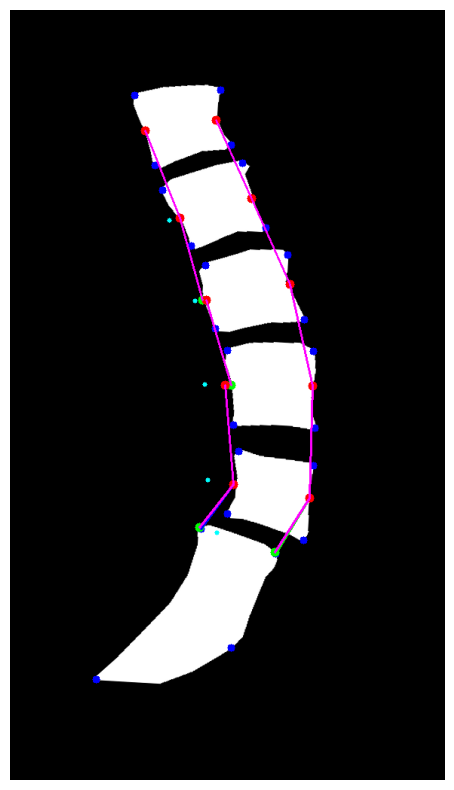

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import matplotlib.patches as patches
import copy
from scipy.optimize import linear_sum_assignment


def detect_corners_convex_hull(binary_mask):
    """
    Using convex hull and extreme points to find the outermost corners
    """
    # Find contours
    def score(c):
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        aspect = w / max(h, 1)
        return area - 0.2 * abs(aspect - 1)    
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), 
                                     cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    largest_contour = max(contours, key=score)
    
    # Get convex hull
    hull = cv2.convexHull(largest_contour)
    
    # Simplify to get 4 corners (approximate as quadrilateral)
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    # If we don't get exactly 4 points, try adjusting epsilon
    attempts = 0
    while len(approx) != 4 and attempts < 20:
        if len(approx) > 4:
            epsilon *= 1.1
        else:
            epsilon *= 0.9
        approx = cv2.approxPolyDP(hull, epsilon, True)
        attempts += 1
    
    if len(approx) == 4:
        return approx.reshape(4, 2)
    else:
        raise ValueError("Could not approximate to 4 corners.")


def visualize_corners(binary_mask, corners, method_name="", image=None):
    """
    Visualize the detected corners on the mask
    """
    # Create RGB image for visualization
    if image is not None:
        vis_img = copy.deepcopy(image)
    else:
        vis_img = cv2.cvtColor(binary_mask.astype(np.uint8) * 255, 
                           cv2.COLOR_GRAY2RGB)
    
    if corners is None:
        print(f"{method_name}: No corners detected")
        return vis_img
    
    # Draw corners with different colors
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # R, G, B, Y
    
    for i, (corner, color) in enumerate(zip(corners, colors)):
        x, y = int(corner[0]), int(corner[1])
        # cv2.circle(vis_img, (x, y), 8, color, -1)
    
    # Draw lines connecting corners
    for i in range(4):
        pt1 = tuple(corners[i].astype(int))
        pt2 = tuple(corners[(i+1)%4].astype(int))
        # cv2.line(vis_img, pt1, pt2, (0, 255, 255), 2)
    
    return vis_img

def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    return np.linalg.norm(point1 - point2)


def find_corner_pairs(corners1, corners2, excluded_corners1=None, excluded_corners2=None): 
    """
    Find the two corner pairs that minimize total distance using Hungarian matching.
    Args:
        corners1: 4x2 array of corners from vertebra 1
        corners2: 4x2 array of corners from vertebra 2
        excluded_corners1: Set of indices from corners1 that should not be used
        excluded_corners2: Set of indices from corners2 that should not be used
    Returns:
        Tuple of (selected_pairs, used_corners1, used_corners2)
    """
    if excluded_corners1 is None:
        excluded_corners1 = set()
    if excluded_corners2 is None:
        excluded_corners2 = set()
    
    # Get available corners
    available_idx1 = [i for i in range(len(corners1)) if i not in excluded_corners1]
    available_idx2 = [j for j in range(len(corners2)) if j not in excluded_corners2]
    
    if len(available_idx1) < 2 or len(available_idx2) < 2:
        raise ValueError("Not enough available corners for matching")
    
    # Build cost matrix for available corners
    n1 = len(available_idx1)
    n2 = len(available_idx2)
    cost_matrix = np.zeros((n1, n2))
    
    for i, idx1 in enumerate(available_idx1):
        for j, idx2 in enumerate(available_idx2):
            cost_matrix[i, j] = calculate_distance(corners1[idx1], corners2[idx2])
    
    # If we need exactly 2 pairs and have more corners, we need to solve a restricted assignment
    # Try all combinations of selecting 2 from each set and find the best matching
    from itertools import combinations
    
    best_total_distance = float('inf')
    best_pairs = None
    best_used1 = None
    best_used2 = None
    
    # Generate all possible combinations of 2 corners from each set
    for combo1 in combinations(range(n1), 2):
        for combo2 in combinations(range(n2), 2):
            # Build 2x2 cost matrix for this combination
            small_cost = np.zeros((2, 2))
            for i, idx1 in enumerate(combo1):
                for j, idx2 in enumerate(combo2):
                    small_cost[i, j] = cost_matrix[idx1, idx2]
            
            # Apply Hungarian algorithm to this 2x2 matrix
            row_ind, col_ind = linear_sum_assignment(small_cost)
            total_distance = small_cost[row_ind, col_ind].sum()
            
            if total_distance < best_total_distance:
                best_total_distance = total_distance
                # Map back to original indices
                best_used1 = {available_idx1[combo1[i]] for i in row_ind}
                best_used2 = {available_idx2[combo2[j]] for j in col_ind}
                best_pairs = [
                    (tuple(corners1[available_idx1[combo1[row_ind[k]]]]), 
                     tuple(corners2[available_idx2[combo2[col_ind[k]]]]))
                    for k in range(2)
                ]
    
    return best_pairs, best_used1, best_used2


def check_vertebrae_ordering(s1_box, vertebra_box):
    """
    Check the y coordinates of s1 box and any other vertebra box to determine if upside down.
    """
    s1_average_y = (s1_box[1] + s1_box[3]) / 2
    vertebra_average_y = (vertebra_box[1] + vertebra_box[3]) / 2
    return s1_average_y > vertebra_average_y # if True, then no need to flip


def align_spine_and_get_transform(image, vertebra_data):
    print("Aligning spine...")
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # --- PCA Logic ---
    y_idxs, x_idxs = np.nonzero(img)
    coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    rotation_angle = np.degrees(angle_rad) + 90 

    # --- Matrix Calculation ---
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    M[0, 2] += (w/2 - center_x)
    M[1, 2] += (h/2 - center_y)

    # Warp
    aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)

    # Transform vertebrae data
    dims = (w, h)
    vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, False, dims)

    # --- Upside Down Check (Bounding Box Method) ---
    # This is my new method to check if the spine is upside down
    # S1 box values must have the highest y values (lowest in image)
    if not check_vertebrae_ordering(vertebra_data_transformed['s1']['box_coordinates'], vertebra_data_transformed['l3']['box_coordinates']):
        # Since the order is false, then flip the image and all vertebrae data
        aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
        vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, True, dims) # Recalculate with flip=True
        
    # RETURN EVERYTHING
    return aligned_img, vertebra_data_transformed, M


def transform_vertebrae_data(data, M, flipped, img_dims):
    w, h = img_dims
    data_copy = copy.deepcopy(data)
    # We iterate over every vertebra (l1, l2, s1, etc.)
    for key, value in data_copy.items():
        # 1. Get the absolute corners (N, 2)
        corners = np.array(value['corners_absolute'], dtype=np.float32)
        
        # 2. Reshape for OpenCV: (N, 1, 2)
        # OpenCV needs this specific 3D shape for the transform function
        corners_reshaped = np.array([corners]) 
        
        # 3. Apply the Affine Transform (Rotation + Centering)
        # This aligns the points exactly like the image pixels
        transformed_corners = cv2.transform(corners_reshaped, M)[0]
        
        # 4. Apply 180 Flip if necessary
        if flipped:
            # print("Flipping vertebrae data...")
            # Formula: new_x = width - x, new_y = height - y
            transformed_corners[:, 0] = w - transformed_corners[:, 0]
            transformed_corners[:, 1] = h - transformed_corners[:, 1]

        # 5. Update the Dictionary
        # Round to integers
        transformed_corners = transformed_corners.astype(np.int32)
        value['corners_absolute'] = transformed_corners
        
        # Recalculate Bounding Box [min_x, min_y, max_x, max_y]
        min_x = np.min(transformed_corners[:, 0])
        max_x = np.max(transformed_corners[:, 0])
        min_y = np.min(transformed_corners[:, 1])
        max_y = np.max(transformed_corners[:, 1])
        
        value['box_coordinates'] = [int(min_x), int(min_y), int(max_x), int(max_y)]
        
        # Update relative corners (corners relative to the new box)
        # Logic: relative = absolute - top_left_of_box
        top_left = np.array([min_x, min_y])
        value['corners'] = transformed_corners - top_left

    return data_copy


def calculate_slope(l5_points, s1_points, image=None):
    """
    Calculate the slope between two points.
    Each point is a tuple (x, y).
    Slope = (y2 - y1) / (x2 - x1)
    
    Pairs leftmost L5 point with leftmost S1 point, and rightmost with rightmost.
    """
    average_slope = 0
    l5_point1, l5_point2 = l5_points
    s1_point1, s1_point2 = s1_points
    
    # Sort L5 points by x-coordinate (left to right)
    if l5_point1[0] < l5_point2[0]:
        l5_left = l5_point1
        l5_right = l5_point2
    else:
        l5_left = l5_point2
        l5_right = l5_point1
    
    # Sort S1 points by x-coordinate (left to right)
    if s1_point1[0] < s1_point2[0]:
        s1_left = s1_point1
        s1_right = s1_point2
    else:
        s1_left = s1_point2
        s1_right = s1_point1
    
    # Pair left with left
    if image is not None:
        cv2.line(image, tuple(l5_left), tuple(s1_left), (255, 0, 0), 2)
    slope1 = (s1_left[1] - l5_left[1]) / (s1_left[0] - l5_left[0] + 1e-7)
    
    # Pair right with right
    if image is not None:
        cv2.line(image, tuple(l5_right), tuple(s1_right), (0, 255, 0), 2)
    slope2 = (s1_right[1] - l5_right[1]) / (s1_right[0] - l5_right[0] + 1e-7)
    
    average_slope = (slope1 + slope2) / 2
    return average_slope


def transform_pairs(pairs_dict, value=0):
    result = {}
    
    for key, point_pairs in pairs_dict.items():
        pair1, pair2 = point_pairs
        
        # Calculate average x for each pair
        avg_x1 = (pair1[0][0] + pair1[1][0]) / 2
        avg_x2 = (pair2[0][0] + pair2[1][0]) / 2
        
        if value > 0:
            # Pair with more x values gets "Left Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Abdominal Points": pair1,
                    "Back Points": pair2
                }
            else:
                result[key] = {
                    "Abdominal Points": pair2,
                    "Back Points": pair1
                }
        else:
            # Opposite: pair with less x values gets "Right Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Back Points": pair1,
                    "Abdominal Points": pair2
                }
            else:
                result[key] = {
                    "Back Points": pair2,
                    "Abdominal Points": pair1
                }
    
    return result


def calculate_slip_distance(data):
    """
    Calculate spondylolisthesis slip distance.
    
    Args:
        data: Dictionary with 'Abdominal Points' and 'Back Points'
              Each contains ((upper_x, upper_y), (lower_x, lower_y))
    
    Returns:
        dict: Contains slip_distance, ap_length, slip_percentage, and intersection_point
    """
    # Extract points
    abdominal_points = data['Abdominal Points']
    back_points = data['Back Points']
    
    # S1 (lower vertebra) superior endplate points
    s1_anterior = np.array(abdominal_points[1])  # (305, 631)
    s1_posterior = np.array(back_points[1])      # (386, 662)
    
    # L5 (upper vertebra) posterior corner
    l5_posterior = np.array(back_points[0])      # (419, 612)
    
    # Create infinite line through S1 superior endplate
    # Line direction vector
    s1_direction = s1_anterior - s1_posterior
    
    # Find perpendicular projection of L5 posterior onto S1 line
    # Using vector projection formula
    # Point on line closest to l5_posterior
    t = np.dot(l5_posterior - s1_posterior, s1_direction) / np.dot(s1_direction, s1_direction)
    intersection_point = s1_posterior + t * s1_direction
    
    # Calculate slip distance (from S1 posterior to intersection point)
    slip_distance = np.linalg.norm(intersection_point - s1_posterior)
    
    # Calculate AP length (full length of S1 superior surface)
    ap_length = np.linalg.norm(s1_anterior - s1_posterior)
    
    # Calculate slip percentage
    slip_percentage = (slip_distance / ap_length) * 100
    
    return {
        'slip_distance': slip_distance,
        'ap_length': ap_length,
        'slip_percentage': slip_percentage,
        'intersection_point': tuple(intersection_point),
        'l5_posterior': tuple(l5_posterior),
        's1_posterior': tuple(s1_posterior),
        's1_anterior': tuple(s1_anterior)
    }

def smooth_mask(mask,):
    
    smooth_mask = cv2.GaussianBlur(mask, (1, 7), 0)
    _, smooth_mask = cv2.threshold(smooth_mask, 220, 255, cv2.THRESH_BINARY)

    return smooth_mask




# Reading the image and model
# image = cv2.imread("sam_data3/train/masks/223018072-XR0067_jpg.rf.c90b61f5bee584a3b457d3b4c60e99f2.png")
mask_orig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
results = model(image, verbose=False)

# Convert image to binary image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# Convert back to BGR for visualization with colored corners
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Smooth the mask
binary_image = smooth_mask(binary_image)

# Class names mapping
vertebra_classes = {
    0: 'l1',
    1: 'l2',
    2: 'l3',
    3: 'l4',
    4: 'l5',
    5: 's1'
}

# Dictionary to store vertebra data
vertebra_data = {}

# Process all detected vertebrae
for box in results[0].boxes:
    cls_id = int(box.cls)
    
    if cls_id in vertebra_classes:
        vertebra_name = vertebra_classes[cls_id]
        
        # Get bounding box coordinates
        box_coords = list(map(int, box.xyxy[0].cpu().numpy()))
        
        # Extract mask region
        mask = binary_image[box_coords[1]:box_coords[3], 
                           box_coords[0]:box_coords[2]]
        
        # Initialize vertebra data entry
        vertebra_data[vertebra_name] = {
            'box_coordinates': box_coords,
            'corners': None,
            'corners_absolute': None  # Corners in original image coordinates
        }
        
        # Detect corners
        corners = detect_corners_convex_hull(mask)
        if corners is not None:                
            # Store relative corners (within the bounding box)
            vertebra_data[vertebra_name]['corners'] = corners
            
            # Convert to absolute coordinates (in original image)
            corners_absolute = corners.copy()
            corners_absolute[:, 0] += box_coords[0]  # Add x offset
            corners_absolute[:, 1] += box_coords[1]  # Add y offset
            vertebra_data[vertebra_name]['corners_absolute'] = corners_absolute
            
            # Visualize corners
            cropped = image[box_coords[1]:box_coords[3], box_coords[0]:box_coords[2]]
            mask_vis = visualize_corners(mask, corners, f"{vertebra_name.upper()}", image=cropped)
            image[box_coords[1]:box_coords[3], 
                    box_coords[0]:box_coords[2]] = mask_vis
            


# Image Alignment and transform data
aligned_img, vertebra_data_transformed, M = align_spine_and_get_transform(image, vertebra_data) # Takes BGR image Returns aligned grayscale image

# vertebra_data_transformed['l2']['corners_absolute'][3][0] -= 3
# vertebra_data_transformed['l3']['corners_absolute'][3][1] += 30


aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2BGR)



# Draw the boxes of vertebrae on the aligned image for visualization
for key, value in vertebra_data_transformed.items():
    box = value['box_coordinates']
    # Draw corners absolute
    for corner in value['corners_absolute']:
        cv2.circle(aligned_img, tuple(corner), 5, (255, 0, 0), -1)  # Blue corners
        
    # cv2.rectangle(aligned_img, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)
    # cv2.putText(aligned_img, key.upper(), (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

# Transform the coordinates to the aligned space

Pairs = {('l1', 'l2'):[], ('l2', 'l3'):[], ('l3', 'l4'):[], ('l4', 'l5'):[], ('l5', 's1'):[]}

# Track which corners were used from each vertebra
previous_used_corners = {}

for (v1, v2) in Pairs.keys():
    if v1 in vertebra_data_transformed and v2 in vertebra_data_transformed:
        corners1 = vertebra_data_transformed[v1]['corners_absolute']
        corners2 = vertebra_data_transformed[v2]['corners_absolute']
        
        if corners1 is not None and corners2 is not None:
            # Get excluded corners
            excluded_v1 = previous_used_corners.get(v1, set())
            excluded_v2 = previous_used_corners.get(v2, set())
                        
            closest_pairs, used_corners1, used_corners2 = find_corner_pairs(
                corners1, corners2, excluded_v1, excluded_v2
            )
            Pairs[(v1, v2)] = closest_pairs
            
            # Store which corners were used from both vertebrae
            previous_used_corners[v1] = used_corners1
            previous_used_corners[v2] = used_corners2


# (177,162),(273,146),
# (228,281),(320,250),
# (259,384),(368,367),
# (296,511),(401,509),
# (302,635),(397,654),
# (254,689),(354,726)

# [(179,160),(275,144),(225,276),(322,245),(255,385),(371,364),(293,498),(401,499),(296,630),(397,648),(251,687),(351,720)]



Pairs[('l1', 'l2')] = [((179,160), (225,276)), ((273,146), (320,250))]
Pairs[('l2', 'l3')] = [((225,276), (255,385)), ((320,250), (371,364))]
Pairs[('l3', 'l4')] = [((260,385), (293,498)), ((371,364), (401,499))]
Pairs[('l4', 'l5')] = [((285,498), (296,630)), ((401,499), (397,648))]
Pairs[('l5', 's1')] = [((296,630), (251,687)), ((397,648), (351,720))]


"""
Pairs structure example:
{
('l1', 'l2'): [((l1_x1, l1_y1), (l2_x1, l2_y1)), ((l1_x2, l1_y2), (l2_x2, l2_y2))],
}
"""


cv2.imwrite("aligned_img_with_cornsssers.png", aligned_img)

# Visualize the manually defined pairs
for (v1, v2), corner_pairs in Pairs.items():
    for (corner1, corner2) in corner_pairs:
        cv2.line(aligned_img, corner1, corner2, (0, 255, 255), 2)  # Yellow lines
        cv2.circle(aligned_img, corner1, 6, (0, 0, 255), -1)  # Red points
        cv2.circle(aligned_img, corner2, 6, (0, 255, 0), -1)  # Green points

# Calculate the slop between the l5 and s1 vertebrae bottom surfaces to know the abdominal and back side.

# Find the two points that have the longest distance between them
# 1. Get the l5 bottom corners
l5_bottom_1, l5_bottom_2 = Pairs[('l5', 's1')][0][0], Pairs[('l5', 's1')][1][0]
# 2. Get the s1 bottom corners, The points that are not in Pairs[('l5', 's1')]
s1_bottom_1, s1_bottom_2 = None, None
all_s1_corners = vertebra_data_transformed['s1']['corners_absolute']



for corner in all_s1_corners:
    if not (np.array_equal(corner, Pairs[('l5', 's1')][0][1]) or np.array_equal(corner, Pairs[('l5', 's1')][1][1])):
        if s1_bottom_1 is None:
            s1_bottom_1 = corner
        else:
            s1_bottom_2 = corner

# 3. Calculate slope between the two bottom points of l5 and s1
slope = calculate_slope((l5_bottom_1, l5_bottom_2), (s1_bottom_1, s1_bottom_2), aligned_img)
print(f"Slope between L5 and S1 bottom surfaces: {slope}")
# If slope is positive, then left side is abdominal side, right side is back side
# If slope is negative, then left side is back side, right side is abdominal side


# Transform the dictionary
new_pairs = transform_pairs(Pairs, slope)

# Print result
# for key, value in new_pairs.items():
#     # Visulize the points on the image
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][0]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][1]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Back Points"][0]), 8, (0, 255, 0), -1)  # Green
#     cv2.circle(aligned_img, tuple(value["Back Points"][1]), 8, (0, 255, 0), -1)  # Green


for key, value in new_pairs.items(): 
    print(f"Calculating slip distance for vertebra pair: {key}")   
    result = calculate_slip_distance(value)
    # print(f"Slip Distance: {result['slip_distance']:.2f} pixels")
    # print(f"AP Length: {result['ap_length']:.2f} pixels")
    print(f"Slip Percentage: {result['slip_percentage']:.2f}%")
    # Visualize intersection point and lines
    cv2.circle(aligned_img, tuple(map(int, result['intersection_point'])), 3, (255, 255, 0), -1)  # Cyan
    
        


# Draw the pairs on the image
for (v1, v2), corner_pairs in Pairs.items():
    for (corner1, corner2) in corner_paimport cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import matplotlib.patches as patches
import copy
from scipy.optimize import linear_sum_assignment


def detect_corners_convex_hull(binary_mask):
    """
    Using convex hull and extreme points to find the outermost corners
    """
    # Find contours
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), 
                                     cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get convex hull
    hull = cv2.convexHull(largest_contour)
    
    # Simplify to get 4 corners (approximate as quadrilateral)
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    # If we don't get exactly 4 points, try adjusting epsilon
    attempts = 0
    while len(approx) != 4 and attempts < 20:
        if len(approx) > 4:
            epsilon *= 1.1
        else:
            epsilon *= 0.9
        approx = cv2.approxPolyDP(hull, epsilon, True)
        attempts += 1
    
    if len(approx) == 4:
        return approx.reshape(4, 2)
    else:
        raise ValueError("Could not approximate to 4 corners.")


def visualize_corners(binary_mask, corners, method_name="", image=None):
    """
    Visualize the detected corners on the mask
    """
    # Create RGB image for visualization
    if image is not None:
        vis_img = copy.deepcopy(image)
    else:
        vis_img = cv2.cvtColor(binary_mask.astype(np.uint8) * 255, 
                           cv2.COLOR_GRAY2RGB)
    
    if corners is None:
        print(f"{method_name}: No corners detected")
        return vis_img
    
    # Draw corners with different colors
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # R, G, B, Y
    
    for i, (corner, color) in enumerate(zip(corners, colors)):
        x, y = int(corner[0]), int(corner[1])
        cv2.circle(vis_img, (x, y), 8, color, -1)
    
    # Draw lines connecting corners
    for i in range(4):
        pt1 = tuple(corners[i].astype(int))
        pt2 = tuple(corners[(i+1)%4].astype(int))
        cv2.line(vis_img, pt1, pt2, (0, 255, 255), 2)
    
    return vis_img

def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    return np.linalg.norm(point1 - point2)


def find_corner_pairs(corners1, corners2, excluded_corners1=None, excluded_corners2=None): 
    """
    Find the two corner pairs that minimize total distance using Hungarian matching.
    Args:
        corners1: 4x2 array of corners from vertebra 1
        corners2: 4x2 array of corners from vertebra 2
        excluded_corners1: Set of indices from corners1 that should not be used
        excluded_corners2: Set of indices from corners2 that should not be used
    Returns:
        Tuple of (selected_pairs, used_corners1, used_corners2)
    """
    if excluded_corners1 is None:
        excluded_corners1 = set()
    if excluded_corners2 is None:
        excluded_corners2 = set()
    
    # Get available corners
    available_idx1 = [i for i in range(len(corners1)) if i not in excluded_corners1]
    available_idx2 = [j for j in range(len(corners2)) if j not in excluded_corners2]
    
    if len(available_idx1) < 2 or len(available_idx2) < 2:
        raise ValueError("Not enough available corners for matching")
    
    # Build cost matrix for available corners
    n1 = len(available_idx1)
    n2 = len(available_idx2)
    cost_matrix = np.zeros((n1, n2))
    
    for i, idx1 in enumerate(available_idx1):
        for j, idx2 in enumerate(available_idx2):
            cost_matrix[i, j] = calculate_distance(corners1[idx1], corners2[idx2])
    
    # If we need exactly 2 pairs and have more corners, we need to solve a restricted assignment
    # Try all combinations of selecting 2 from each set and find the best matching
    from itertools import combinations
    
    best_total_distance = float('inf')
    best_pairs = None
    best_used1 = None
    best_used2 = None
    
    # Generate all possible combinations of 2 corners from each set
    for combo1 in combinations(range(n1), 2):
        for combo2 in combinations(range(n2), 2):
            # Build 2x2 cost matrix for this combination
            small_cost = np.zeros((2, 2))
            for i, idx1 in enumerate(combo1):
                for j, idx2 in enumerate(combo2):
                    small_cost[i, j] = cost_matrix[idx1, idx2]
            
            # Apply Hungarian algorithm to this 2x2 matrix
            row_ind, col_ind = linear_sum_assignment(small_cost)
            total_distance = small_cost[row_ind, col_ind].sum()
            
            if total_distance < best_total_distance:
                best_total_distance = total_distance
                # Map back to original indices
                best_used1 = {available_idx1[combo1[i]] for i in row_ind}
                best_used2 = {available_idx2[combo2[j]] for j in col_ind}
                best_pairs = [
                    (tuple(corners1[available_idx1[combo1[row_ind[k]]]]), 
                     tuple(corners2[available_idx2[combo2[col_ind[k]]]]))
                    for k in range(2)
                ]
    
    return best_pairs, best_used1, best_used2


def check_vertebrae_ordering(s1_box, vertebra_box):
    """
    Check the y coordinates of s1 box and any other vertebra box to determine if upside down.
    """
    s1_average_y = (s1_box[1] + s1_box[3]) / 2
    vertebra_average_y = (vertebra_box[1] + vertebra_box[3]) / 2
    return s1_average_y > vertebra_average_y # if True, then no need to flip


def align_spine_and_get_transform(image, vertebra_data):
    print("Aligning spine...")
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # --- PCA Logic ---
    y_idxs, x_idxs = np.nonzero(img)
    coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    rotation_angle = np.degrees(angle_rad) + 90 

    # --- Matrix Calculation ---
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    M[0, 2] += (w/2 - center_x)
    M[1, 2] += (h/2 - center_y)

    # Warp
    aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)

    # Transform vertebrae data
    dims = (w, h)
    vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, False, dims)

    # --- Upside Down Check (Bounding Box Method) ---
    # This is my new method to check if the spine is upside down
    # S1 box values must have the highest y values (lowest in image)
    if not check_vertebrae_ordering(vertebra_data_transformed['s1']['box_coordinates'], vertebra_data_transformed['l3']['box_coordinates']):
        # Since the order is false, then flip the image and all vertebrae data
        aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
        vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, True, dims) # Recalculate with flip=True
        
    # RETURN EVERYTHING
    return aligned_img, vertebra_data_transformed


def transform_vertebrae_data(data, M, flipped, img_dims):
    w, h = img_dims
    data_copy = copy.deepcopy(data)
    # We iterate over every vertebra (l1, l2, s1, etc.)
    for key, value in data_copy.items():
        # 1. Get the absolute corners (N, 2)
        corners = np.array(value['corners_absolute'], dtype=np.float32)
        
        # 2. Reshape for OpenCV: (N, 1, 2)
        # OpenCV needs this specific 3D shape for the transform function
        corners_reshaped = np.array([corners]) 
        
        # 3. Apply the Affine Transform (Rotation + Centering)
        # This aligns the points exactly like the image pixels
        transformed_corners = cv2.transform(corners_reshaped, M)[0]
        
        # 4. Apply 180 Flip if necessary
        if flipped:
            # print("Flipping vertebrae data...")
            # Formula: new_x = width - x, new_y = height - y
            transformed_corners[:, 0] = w - transformed_corners[:, 0]
            transformed_corners[:, 1] = h - transformed_corners[:, 1]

        # 5. Update the Dictionary
        # Round to integers
        transformed_corners = transformed_corners.astype(np.int32)
        value['corners_absolute'] = transformed_corners
        
        # Recalculate Bounding Box [min_x, min_y, max_x, max_y]
        min_x = np.min(transformed_corners[:, 0])
        max_x = np.max(transformed_corners[:, 0])
        min_y = np.min(transformed_corners[:, 1])
        max_y = np.max(transformed_corners[:, 1])
        
        value['box_coordinates'] = [int(min_x), int(min_y), int(max_x), int(max_y)]
        
        # Update relative corners (corners relative to the new box)
        # Logic: relative = absolute - top_left_of_box
        top_left = np.array([min_x, min_y])
        value['corners'] = transformed_corners - top_left

    return data_copy


def calculate_slope(l5_points, s1_points, image=None):
    """
    Calculate the slope between two points.
    Each point is a tuple (x, y).
    Slope = (y2 - y1) / (x2 - x1)
    
    Pairs leftmost L5 point with leftmost S1 point, and rightmost with rightmost.
    """
    average_slope = 0
    l5_point1, l5_point2 = l5_points
    s1_point1, s1_point2 = s1_points
    
    # Sort L5 points by x-coordinate (left to right)
    if l5_point1[0] < l5_point2[0]:
        l5_left = l5_point1
        l5_right = l5_point2
    else:
        l5_left = l5_point2
        l5_right = l5_point1
    
    # Sort S1 points by x-coordinate (left to right)
    if s1_point1[0] < s1_point2[0]:
        s1_left = s1_point1
        s1_right = s1_point2
    else:
        s1_left = s1_point2
        s1_right = s1_point1
    
    # Pair left with left
    if image is not None:
        cv2.line(image, tuple(l5_left), tuple(s1_left), (255, 0, 0), 2)
    slope1 = (s1_left[1] - l5_left[1]) / (s1_left[0] - l5_left[0] + 1e-7)
    
    # Pair right with right
    if image is not None:
        cv2.line(image, tuple(l5_right), tuple(s1_right), (0, 255, 0), 2)
    slope2 = (s1_right[1] - l5_right[1]) / (s1_right[0] - l5_right[0] + 1e-7)
    
    average_slope = (slope1 + slope2) / 2
    return average_slope


def transform_pairs(pairs_dict, value=0):
    result = {}
    
    for key, point_pairs in pairs_dict.items():
        pair1, pair2 = point_pairs
        
        # Calculate average x for each pair
        avg_x1 = (pair1[0][0] + pair1[1][0]) / 2
        avg_x2 = (pair2[0][0] + pair2[1][0]) / 2
        
        if value > 0:
            # Pair with more x values gets "Left Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Abdominal Points": pair1,
                    "Back Points": pair2
                }
            else:
                result[key] = {
                    "Abdominal Points": pair2,
                    "Back Points": pair1
                }
        else:
            # Opposite: pair with less x values gets "Right Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Back Points": pair1,
                    "Abdominal Points": pair2
                }
            else:
                result[key] = {
                    "Back Points": pair2,
                    "Abdominal Points": pair1
                }
    
    return result


def calculate_slip_distance(data):
    """
    Calculate spondylolisthesis slip distance.
    
    Args:
        data: Dictionary with 'Abdominal Points' and 'Back Points'
              Each contains ((upper_x, upper_y), (lower_x, lower_y))
    
    Returns:
        dict: Contains slip_distance, ap_length, slip_percentage, and intersection_point
    """
    # Extract points
    abdominal_points = data['Abdominal Points']
    back_points = data['Back Points']
    
    # S1 (lower vertebra) superior endplate points
    s1_anterior = np.array(abdominal_points[1])  # (305, 631)
    s1_posterior = np.array(back_points[1])      # (386, 662)
    
    # L5 (upper vertebra) posterior corner
    l5_posterior = np.array(back_points[0])      # (419, 612)
    
    # Create infinite line through S1 superior endplate
    # Line direction vector
    s1_direction = s1_anterior - s1_posterior
    
    # Find perpendicular projection of L5 posterior onto S1 line
    # Using vector projection formula
    # Point on line closest to l5_posterior
    t = np.dot(l5_posterior - s1_posterior, s1_direction) / np.dot(s1_direction, s1_direction)
    intersection_point = s1_posterior + t * s1_direction
    
    # Calculate slip distance (from S1 posterior to intersection point)
    slip_distance = np.linalg.norm(intersection_point - s1_posterior)
    
    # Calculate AP length (full length of S1 superior surface)
    ap_length = np.linalg.norm(s1_anterior - s1_posterior)
    
    # Calculate slip percentage
    slip_percentage = (slip_distance / ap_length) * 100
    
    return {
        'slip_distance': slip_distance,
        'ap_length': ap_length,
        'slip_percentage': slip_percentage,
        'intersection_point': tuple(intersection_point),
        'l5_posterior': tuple(l5_posterior),
        's1_posterior': tuple(s1_posterior),
        's1_anterior': tuple(s1_anterior)
    }

def smooth_mask(mask,):
    
    smooth_mask = cv2.GaussianBlur(mask, (15, 15), 0)
    _, smooth_mask = cv2.threshold(smooth_mask, 220, 255, cv2.THRESH_BINARY)

    return smooth_mask




# Reading the image and model
# image = cv2.imread("sam_data3/train/masks/223018072-XR0067_jpg.rf.c90b61f5bee584a3b457d3b4c60e99f2.png")
mask_orig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
results = model(image, verbose=False)

# Convert image to binary image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# Convert back to BGR for visualization with colored corners
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Smooth the mask
# binary_image = smooth_mask(binary_image)

# Class names mapping
vertebra_classes = {
    0: 'l1',
    1: 'l2',
    2: 'l3',
    3: 'l4',
    4: 'l5',
    5: 's1'
}

# Dictionary to store vertebra data
vertebra_data = {}

# Process all detected vertebrae
for box in results[0].boxes:
    cls_id = int(box.cls)
    
    if cls_id in vertebra_classes:
        vertebra_name = vertebra_classes[cls_id]
        
        # Get bounding box coordinates
        box_coords = list(map(int, box.xyxy[0].cpu().numpy()))
        
        # Extract mask region
        mask = binary_image[box_coords[1]:box_coords[3], 
                           box_coords[0]:box_coords[2]]
        
        # Initialize vertebra data entry
        vertebra_data[vertebra_name] = {
            'box_coordinates': box_coords,
            'corners': None,
            'corners_absolute': None  # Corners in original image coordinates
        }
        
        # Detect corners
        corners = detect_corners_convex_hull(mask)
        if corners is not None:                
            # Store relative corners (within the bounding box)
            vertebra_data[vertebra_name]['corners'] = corners
            
            # Convert to absolute coordinates (in original image)
            corners_absolute = corners.copy()
            corners_absolute[:, 0] += box_coords[0]  # Add x offset
            corners_absolute[:, 1] += box_coords[1]  # Add y offset
            vertebra_data[vertebra_name]['corners_absolute'] = corners_absolute
            
            # Visualize corners
            cropped = image[box_coords[1]:box_coords[3], box_coords[0]:box_coords[2]]
            mask_vis = visualize_corners(mask, corners, f"{vertebra_name.upper()}", image=cropped)
            image[box_coords[1]:box_coords[3], 
                    box_coords[0]:box_coords[2]] = mask_vis

# Image Alignment and transform data
aligned_img, vertebra_data_transformed = align_spine_and_get_transform(image, vertebra_data) # Takes BGR image Returns aligned grayscale image

aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2BGR)

# Draw the boxes of vertebrae on the aligned image for visualization
for key, value in vertebra_data_transformed.items():
    box = value['box_coordinates']
    # Draw corners absolute
    for corner in value['corners_absolute']:
        cv2.circle(aligned_img, tuple(corner), 5, (255, 0, 0), -1)  # Blue corners
        
    # cv2.rectangle(aligned_img, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)
    # cv2.putText(aligned_img, key.upper(), (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

# Transform the coordinates to the aligned space

Pairs = {('l1', 'l2'):[], ('l2', 'l3'):[], ('l3', 'l4'):[], ('l4', 'l5'):[], ('l5', 's1'):[]}

# Track which corners were used from each vertebra
previous_used_corners = {}

for (v1, v2) in Pairs.keys():
    if v1 in vertebra_data_transformed and v2 in vertebra_data_transformed:
        corners1 = vertebra_data_transformed[v1]['corners_absolute']
        corners2 = vertebra_data_transformed[v2]['corners_absolute']
        
        if corners1 is not None and corners2 is not None:
            # Get excluded corners
            excluded_v1 = previous_used_corners.get(v1, set())
            excluded_v2 = previous_used_corners.get(v2, set())
                        
            closest_pairs, used_corners1, used_corners2 = find_corner_pairs(
                corners1, corners2, excluded_v1, excluded_v2
            )
            Pairs[(v1, v2)] = closest_pairs
            
            # Store which corners were used from both vertebrae
            previous_used_corners[v1] = used_corners1
            previous_used_corners[v2] = used_corners2
                        
"""
Pairs structure example:
{
('l1', 'l2'): [((l1_x1, l1_y1), (l2_x1, l2_y1)), ((l1_x2, l1_y2), (l2_x2, l2_y2))],
}
"""

# Calculate the slop between the l5 and s1 vertebrae bottom surfaces to know the abdominal and back side.

# Find the two points that have the longest distance between them
# 1. Get the l5 bottom corners
l5_bottom_1, l5_bottom_2 = Pairs[('l5', 's1')][0][0], Pairs[('l5', 's1')][1][0]
# 2. Get the s1 bottom corners, The points that are not in Pairs[('l5', 's1')]
s1_bottom_1, s1_bottom_2 = None, None
all_s1_corners = vertebra_data_transformed['s1']['corners_absolute']

for corner in all_s1_corners:
    if not (np.array_equal(corner, Pairs[('l5', 's1')][0][1]) or np.array_equal(corner, Pairs[('l5', 's1')][1][1])):
        if s1_bottom_1 is None:
            s1_bottom_1 = corner
        else:
            s1_bottom_2 = corner

# 3. Calculate slope between the two bottom points of l5 and s1
slope = calculate_slope((l5_bottom_1, l5_bottom_2), (s1_bottom_1, s1_bottom_2), aligned_img)
print(f"Slope between L5 and S1 bottom surfaces: {slope}")
# If slope is positive, then left side is abdominal side, right side is back side
# If slope is negative, then left side is back side, right side is abdominal side


# Transform the dictionary
new_pairs = transform_pairs(Pairs, slope)

# Print result
# for key, value in new_pairs.items():
#     # Visulize the points on the image
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][0]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][1]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Back Points"][0]), 8, (0, 255, 0), -1)  # Green
#     cv2.circle(aligned_img, tuple(value["Back Points"][1]), 8, (0, 255, 0), -1)  # Green


for key, value in new_pairs.items(): 
    print(f"Calculating slip distance for vertebra pair: {key}")   
    result = calculate_slip_distance(value)
    # print(f"Slip Distance: {result['slip_distance']:.2f} pixels")
    # print(f"AP Length: {result['ap_length']:.2f} pixels")
    print(f"Slip Percentage: {result['slip_percentage']:.2f}%")
    # Visualize intersection point and lines
    cv2.circle(aligned_img, tuple(map(int, result['intersection_point'])), 3, (255, 255, 0), -1)  # Cyan
    
        


# Draw the pairs on the image
for (v1, v2), corner_pairs in Pairs.items():
    for (corner1, corner2) in corner_pairs:
        cv2.line(aligned_img, corner1, corner2, (255, 0, 255), 2)  # Magenta lines

# Show final visualization
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()irs:
        cv2.line(aligned_img, corner1, corner2, (255, 0, 255), 2)  # Magenta lines

# Show final visualization
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [3]:
image = cv2.imread("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/masks/157038-2-_jpg.rf.932046426aa44e414bdd25fc881a7250.png")

In [1]:
import cv2
import json
import numpy as np
import os 

"""
Initializes an interactive polygon drawing tool for defining areas in videos or images.

This function enables users to draw and save multiple polygons on an image or video frame,
which can be used to define regions of interest such as barista areas, customer 
interaction zones, or other spatial boundaries for computer vision applications.

    Controls:
        - Left click: Place a point
        - Right click: Close the current polygon
        - 's' key: Save the current polygon and start a new one
        - 'r' key: Reset the current drawing
        - 'q' key: Quit and save all polygons
"""

# ====================================================================================== #
media_path = 'aligned_img_with_cornsssers.png'  # it could be a video or an image, mp4, jpg, png
# ====================================================================================== #


def draw_polygon(event, x, y, flags, param):
    """
    Handles mouse events for drawing polygons on an image.
    
    This callback function creates interactive polygon drawing functionality by capturing
    mouse events and updating the image accordingly. The function supports:
    - Adding points on left mouse button clicks
    - Drawing lines between consecutive points
    - Closing polygons on right mouse button clicks
    
    Args:
        event (int): The mouse event type (e.g., cv2.EVENT_LBUTTONDOWN)
        x (int): The x-coordinate of the mouse position
        y (int): The y-coordinate of the mouse position
        flags (int): Additional flags passed by OpenCV
        param (tuple): Contains the image, current polygon points list, and all polygons list
        
    The function updates the visualization in real-time to provide visual feedback
    during the polygon drawing process.
    """
    img, current_points, all_polygons = param
    
    if event == cv2.EVENT_LBUTTONDOWN:
        current_points.append((x, y))
        if len(current_points) > 1:
            cv2.line(img, current_points[-2], current_points[-1], (0, 255, 0), 2)
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("Image", img)
    
    elif event == cv2.EVENT_RBUTTONDOWN and len(current_points) > 2:
        # Connect the last point with the first point
        cv2.line(img, current_points[-1], current_points[0], (0, 255, 0), 2)
        cv2.imshow("Image", img)

def barista_areas_init(path):
    """
    
    Args:
        path (str): Path to a video file (.mp4) or image file (.jpg, .png)
        
    Features:
        - Supports both video and image inputs, automatically detecting file type
        - For videos, skips the first few frames to avoid potential initial frame issues
        - Interactive polygon drawing with intuitive mouse controls
        - Ability to save multiple polygons in a single session
        - Reset functionality to redo a polygon if needed
        - Saves all polygons to a text file for later use
    """

    img = None  # Initialize img variable
    
    if path.endswith('.mp4'):
        os.environ['OPENCV_FFMPEG_CAPTURE_OPTIONS'] = 'rtsp_transport;tcp'
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            print(f"Error: Could not open video file {path}")
            return
            
        # Skip first few frames
        for i in range(10):
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame from video")
                return
        img = frame  # Assign the frame to img
            
    elif path.endswith('.jpg') or path.endswith('.png') or path.endswith('.jpeg'):
        img = cv2.imread(path)
        if img is None:
            print(f"Error: Could not read image file {path}")
            return
    else:
        print(f"Error: Unsupported file format for {path}")
        return
        
    # Check if img was successfully loaded
    if img is None:
        print("Error: Could not load image/video frame")
        return
        
    original_img = img.copy()
    current_points = []  # Points for the current polygon
    all_polygons = []    # List to store all completed polygons
    
    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", draw_polygon, (img, current_points, all_polygons))
    
    print("Controls:")
    print("- Left click: Place a point")
    print("- Right click: Close the current polygon")
    print("- 's': Save the current polygon and start a new one")
    print("- 'r': Reset the current drawing")
    print("- 'q': Quit and save all polygons")
    
    while True:
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord('q'):
            break
            
        elif key == ord('r'):
            # Reset the current polygon and redraw
            current_points.clear()
            # Redraw the image with previous polygons
            img[:] = original_img.copy()
            # Redraw all saved polygons
            for polygon in all_polygons:
                pts = np.array(polygon)
                cv2.polylines(img, [pts], True, (0, 255, 0), 2)
                for point in polygon:
                    cv2.circle(img, point, 5, (0, 0, 255), -1)
            cv2.imshow("Image", img)
            
        elif key == ord('s'):
            # Save current polygon if it has at least 3 points
            if len(current_points) >= 3:
                # Complete the polygon if not already closed
                if current_points[0] != current_points[-1]:
                    cv2.line(img, current_points[-1], current_points[0], (0, 255, 0), 2)
                
                # Add current polygon to the list
                all_polygons.append(current_points.copy())
                print(f"Polygon {len(all_polygons)} saved! ({len(current_points)} points)")
                
                # Clear current points and start a new polygon
                current_points.clear()
                
                # Take a clean copy of the original image with all previous polygons
                img[:] = original_img.copy()
                # Redraw all saved polygons
                for polygon in all_polygons:
                    pts = np.array(polygon)
                    cv2.polylines(img, [pts], True, (0, 255, 0), 2)
                    for point in polygon:
                        cv2.circle(img, point, 5, (0, 0, 255), -1)
                cv2.imshow("Image", img)
            else:
                print("Need at least 3 points to save a polygon")
    
    cv2.destroyAllWindows()
    if path.endswith('.mp4'):
        cap.release()
    
    # Save the coordinates of all polygons to a file
    if all_polygons:
        with open('polygon_points.txt', 'w') as file:
            for polygon in all_polygons:
                # Format as list of tuples: [(x1,y1),(x2,y2),...]
                pairs = [f"({x},{y})" for x, y in polygon]
                formatted_polygon = f"[{','.join(pairs)}]\n"
                file.write(formatted_polygon)
        print(f"All polygons saved to polygon_points.txt (Total: {len(all_polygons)})")

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
# it could be a video or an image, mp4, jpg, png
barista_areas_init(media_path)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is not the object's thread (0x3c69fd50).
Cannot move to target thread (0x3c6ab1c0)

QObject::moveToThread: Current thread (0x3c6ab1c0) is n

Controls:
- Left click: Place a point
- Right click: Close the current polygon
- 's': Save the current polygon and start a new one
- 'r': Reset the current drawing
- 'q': Quit and save all polygons
Polygon 1 saved! (12 points)
All polygons saved to polygon_points.txt (Total: 1)


Name: opencv-python-headless
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /home/yousof/anaconda3/envs/Works/lib/python3.10/site-packages
Requires: numpy
Required-by: albucore, albumentations, pysodmetrics, roboflow
Note: you may need to restart the kernel to use updated packages.


In [77]:
Pairs

{('l1', 'l2'): [((292, 179), (307, 203)), ((190, 207), (201, 240))],
 ('l2', 'l3'): [((338, 289), (367, 326)), ((240, 314), (258, 340))],
 ('l3', 'l4'): [((390, 411), (402, 453)), ((272, 424), (288, 453))],
 ('l4', 'l5'): [((404, 555), (403, 605)), ((296, 551), (303, 587))],
 ('l5', 's1'): [((390, 704), (353, 722)), ((289, 670), (254, 690))]}

In [64]:
vertebra_data_transformed['l3']['corners_absolute'][0][0]
vertebra_data_transformed['l3']['corners_absolute'][0][1]


424

In [ ]:
Aligning spine...
Slope between L5 and S1 bottom surfaces: 5.814645283042012
Calculating slip distance for vertebra pair: ('l1', 'l2')
Slip Percentage: 1.46%
Calculating slip distance for vertebra pair: ('l2', 'l3')
Slip Percentage: 3.50%
Calculating slip distance for vertebra pair: ('l3', 'l4')
Slip Percentage: 1.20%
Calculating slip distance for vertebra pair: ('l4', 'l5')
Slip Percentage: 5.24%
Calculating slip distance for vertebra pair: ('l5', 's1')
Slip Percentage: 7.50%

Aligning spine...
Slope between L5 and S1 bottom surfaces: 6.075126233872261
Calculating slip distance for vertebra pair: ('l1', 'l2')
Slip Percentage: 4.41%
Calculating slip distance for vertebra pair: ('l2', 'l3')
Slip Percentage: 3.51%
Calculating slip distance for vertebra pair: ('l3', 'l4')
Slip Percentage: 2.61%
Calculating slip distance for vertebra pair: ('l4', 'l5')
Slip Percentage: 1.48%
Calculating slip distance for vertebra pair: ('l5', 's1')
Slip Percentage: 6.94%

In [15]:
# [((336, 622), (382, 650)), ((438, 655), (268, 629))] calculate distance 

print("distance calculation test:")
pointA1 = np.array((336, 622))
pointA2 = np.array((382, 650))
distanceA = calculate_distance(pointA1, pointA2)
print(f"Distance A: {distanceA}")

pointB1 = np.array((438, 655))
pointB2 = np.array((268, 629))
distanceB = calculate_distance(pointB1, pointB2)
print(f"Distance B: {distanceB}")

distance calculation test:
Distance A: 53.85164807134504
Distance B: 171.97674261364529



=== PCA Analysis: L1, L2, L3 ===

L1 corners:
  Top-Left:     [279 578]
  Top-Right:    [374 583]
  Bottom-Left:  [281 654]
  Bottom-Right: [370 659]

L2 corners:
  Top-Left:     [274 468]
  Top-Right:    [373 476]
  Bottom-Left:  [265 544]
  Bottom-Right: [368 559]

L3 corners:
  Top-Left:     [294 349]
  Top-Right:    [394 383]
  Bottom-Left:  [270 425]
  Bottom-Right: [370 460]
⚠️ L3 is above others - FLIPPING!
✓ Saved: aligned_L1_L2_L3.png


=== PCA Analysis: L3, L4, L5 ===

L3 corners:
  Top-Left:     [270 602]
  Top-Right:    [370 568]
  Bottom-Left:  [297 677]
  Bottom-Right: [399 644]

L4 corners:
  Top-Left:     [249 466]
  Top-Right:    [362 475]
  Bottom-Left:  [253 549]
  Bottom-Right: [360 552]

L5 corners:
  Top-Left:     [297 342]
  Top-Right:    [395 387]
  Bottom-Left:  [280 425]
  Bottom-Right: [381 450]
⚠️ L5 is above others - FLIPPING!
✓ Saved: aligned_L3_L4_L5.png

Processing l1-l2
Excluded indices for l1: set()
Excluded indices for l2: set()
Used indices from l1:

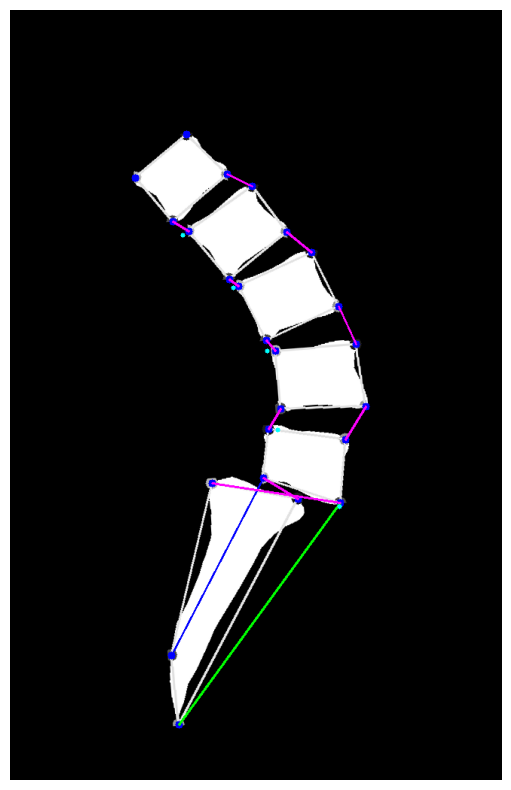

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import matplotlib.patches as patches
import copy
from scipy.optimize import linear_sum_assignment



def identify_corner_labels(corners):
    """
    Identify which corner is top-left, top-right, bottom-left, bottom-right
    Args:
        corners: array of shape (4, 2) with [x, y] coordinates
    Returns:
        dict with keys 'top_left', 'top_right', 'bottom_left', 'bottom_right'
    """
    # Sort by y-coordinate to get top 2 and bottom 2
    sorted_by_y = corners[np.argsort(corners[:, 1])]
    top_two = sorted_by_y[:2]
    bottom_two = sorted_by_y[2:]
    
    # Sort top two by x: left first, then right
    top_sorted = top_two[np.argsort(top_two[:, 0])]
    top_left = top_sorted[0]
    top_right = top_sorted[1]
    
    # Sort bottom two by x: left first, then right
    bottom_sorted = bottom_two[np.argsort(bottom_two[:, 0])]
    bottom_left = bottom_sorted[0]
    bottom_right = bottom_sorted[1]
    
    return {
        'top_left': top_left,
        'top_right': top_right,
        'bottom_left': bottom_left,
        'bottom_right': bottom_right
    }


def detect_corners_convex_hull(binary_mask):
    """
    Using convex hull and extreme points to find the outermost corners
    """
    # Find contours
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), 
                                     cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get convex hull
    hull = cv2.convexHull(largest_contour)
    
    # Simplify to get 4 corners (approximate as quadrilateral)
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    # If we don't get exactly 4 points, try adjusting epsilon
    attempts = 0
    while len(approx) != 4 and attempts < 20:
        if len(approx) > 4:
            epsilon *= 1.1
        else:
            epsilon *= 0.9
        approx = cv2.approxPolyDP(hull, epsilon, True)
        attempts += 1
    
    if len(approx) == 4:
        return approx.reshape(4, 2)
    else:
        raise ValueError("Could not approximate to 4 corners.")


def visualize_corners(binary_mask, corners, method_name="", image=None):
    """
    Visualize the detected corners on the mask
    """
    # Create RGB image for visualization
    if image is not None:
        vis_img = copy.deepcopy(image)
    else:
        vis_img = cv2.cvtColor(binary_mask.astype(np.uint8) * 255, 
                           cv2.COLOR_GRAY2RGB)
    
    if corners is None:
        print(f"{method_name}: No corners detected")
        return vis_img
    
    # Draw corners with different colors
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # R, G, B, Y
    
    for i, (corner, color) in enumerate(zip(corners, colors)):
        x, y = int(corner[0]), int(corner[1])
        cv2.circle(vis_img, (x, y), 8, color, -1)
    
    # Draw lines connecting corners
    for i in range(4):
        pt1 = tuple(corners[i].astype(int))
        pt2 = tuple(corners[(i+1)%4].astype(int))
        cv2.line(vis_img, pt1, pt2, (0, 255, 255), 2)
    
    return vis_img

def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    return np.linalg.norm(point1 - point2)


def find_corner_pairs(corners1, corners2, excluded_corners1=None, excluded_corners2=None): 
    """
    Find the two closest corner pairs between two sets of corners using exhaustive search.
    Args:
        corners1: 4x2 array of corners from vertebra 1
        corners2: 4x2 array of corners from vertebra 2
        excluded_corners1: Set of indices from corners1 that should not be used
        excluded_corners2: Set of indices from corners2 that should not be used
    Returns:
        Tuple of (selected_pairs, used_corners1, used_corners2)
    """
    if excluded_corners1 is None:
        excluded_corners1 = set()
    if excluded_corners2 is None:
        excluded_corners2 = set()
    
    # Calculate distances for ALL possible pairs (excluding already used corners)
    all_pairs = []
    for i, corner1 in enumerate(corners1):
        # Skip if this corner from corners1 was used in previous vertebra
        if i in excluded_corners1:
            continue
            
        for j, corner2 in enumerate(corners2):
            # Skip if this corner from corners2 was used in previous vertebra
            if j in excluded_corners2:
                continue
                
            distance = calculate_distance(corner1, corner2)
            all_pairs.append({
                'corner1': corner1,
                'corner2': corner2,
                'corner1_idx': i,
                'corner2_idx': j,
                'distance': distance
            })
    
    # Sort all pairs by distance
    all_pairs.sort(key=lambda x: x['distance'])
    
    # Find the two closest pairs where no corner is used twice
    selected_pairs = []
    used_corners1 = set()
    used_corners2 = set()
    
    for pair in all_pairs:
        if pair['corner1_idx'] not in used_corners1 and pair['corner2_idx'] not in used_corners2:
            selected_pairs.append((tuple(pair['corner1']), tuple(pair['corner2'])))
            used_corners1.add(pair['corner1_idx'])
            used_corners2.add(pair['corner2_idx'])
            
            if len(selected_pairs) == 2:
                break
    
    return selected_pairs, used_corners1, used_corners2

def check_vertebrae_ordering(s1_box, vertebra_box):
    """
    Check the y coordinates of s1 box and any other vertebra box to determine if upside down.
    """
    s1_average_y = (s1_box[1] + s1_box[3]) / 2
    vertebra_average_y = (vertebra_box[1] + vertebra_box[3]) / 2
    return s1_average_y > vertebra_average_y # if True, then no need to flip


def draw_vertebrae_on_image(img, vertebra_data, vertebra_names, color=(0, 255, 0)):
    """
    Draw bounding boxes and corners on image
    Args:
        img: grayscale image
        vertebra_data: transformed vertebra data
        vertebra_names: list of vertebra names to draw (e.g., ['l1', 'l2', 'l3'])
        color: BGR color tuple
    Returns:
        img_color: color image with drawings
    """
    # Convert grayscale to color
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    for vertebra_name in vertebra_names:
        if vertebra_name not in vertebra_data:
            continue
            
        # Draw bounding box
        box = vertebra_data[vertebra_name]['box_coordinates']
        x1, y1, x2, y2 = box
        cv2.rectangle(img_color, (x1, y1), (x2, y2), color, 2)
        
        # Draw corners
        corners = vertebra_data[vertebra_name]['corners_absolute']
        labeled = identify_corner_labels(corners)
        
        # Draw corner points with labels
        cv2.circle(img_color, tuple(labeled['top_left'].astype(int)), 5, (255, 0, 0), -1)  # Blue
        cv2.circle(img_color, tuple(labeled['top_right'].astype(int)), 5, (0, 255, 0), -1)  # Green
        cv2.circle(img_color, tuple(labeled['bottom_left'].astype(int)), 5, (0, 0, 255), -1)  # Red
        cv2.circle(img_color, tuple(labeled['bottom_right'].astype(int)), 5, (255, 255, 0), -1)  # Cyan
        
        # Add vertebra label
        cv2.putText(img_color, vertebra_name.upper(), (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    return img_color

def align_vertebrae_group(image, vertebra_data, vertebra_names):
    """
    Align a specific group of vertebrae using their own PCA
    Args:
        image: grayscale image
        vertebra_data: original vertebra data
        vertebra_names: list of vertebra names to use for PCA (e.g., ['l1', 'l2', 'l3'])
    Returns:
        aligned_img: rotated image
        vertebra_data_transformed: transformed vertebra data
        M: transformation matrix
    """
    h, w = image.shape
    
    # Collect coordinates from specified vertebrae only
    all_coords = []
    for vname in vertebra_names:
        if vname in vertebra_data:
            corners = vertebra_data[vname]['corners_absolute']
            all_coords.append(corners)
    
    if not all_coords:
        # No vertebrae found, return original
        return image.copy(), vertebra_data, np.eye(2, 3)
    
    # Stack all coordinates
    coords = np.vstack(all_coords).astype(np.float32)
    
    # PCA on this group only
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    rotation_angle = np.degrees(angle_rad) + 90
    
    # Create transformation matrix
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    M[0, 2] += (w/2 - center_x)
    M[1, 2] += (h/2 - center_y)
    
    # Warp image
    aligned_img = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)
    
    # Transform vertebrae data
    dims = (w, h)
    vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, False, dims)
    
    return aligned_img, vertebra_data_transformed, M

def check_and_flip_if_needed(aligned_img, vertebra_data_transformed, vertebra_names, bottom_vertebra, M, dims):
    """
    Check if vertebrae are upside down and flip if needed
    Args:
        aligned_img: aligned image
        vertebra_data_transformed: transformed vertebra data
        vertebra_names: list of all vertebrae in this group
        bottom_vertebra: name of vertebra that should be at bottom (e.g., 'l3' or 'l5')
        M: original transformation matrix
        dims: image dimensions
    Returns:
        aligned_img: potentially flipped image
        vertebra_data_transformed: potentially flipped data
    """
    if bottom_vertebra not in vertebra_data_transformed:
        return aligned_img, vertebra_data_transformed
    
    bottom_y = vertebra_data_transformed[bottom_vertebra]['box_coordinates'][1]
    
    # Check if bottom vertebra is above any others
    needs_flip = False
    for vname in vertebra_names:
        if vname != bottom_vertebra and vname in vertebra_data_transformed:
            other_y = vertebra_data_transformed[vname]['box_coordinates'][1]
            if bottom_y < other_y:
                needs_flip = True
                break
    
    if needs_flip:
        print(f"⚠️ {bottom_vertebra.upper()} is above others - FLIPPING!")
        aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
        vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, True, dims)
    else:
        print(f"✓ Vertebrae order correct ({bottom_vertebra.upper()} at bottom)")
    
    return aligned_img, vertebra_data_transformed

def align_spine_and_get_transform(image, vertebra_data):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # --- PCA for entire spine (main alignment) ---
    y_idxs, x_idxs = np.nonzero(img)
    coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    rotation_angle = np.degrees(angle_rad) + 90 
    
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    M[0, 2] += (w/2 - center_x)
    M[1, 2] += (h/2 - center_y)
    
    aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)
    dims = (w, h)
    vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, False, dims)
    
    # --- Separate PCA for L1, L2, L3 ---
    print("\n=== PCA Analysis: L1, L2, L3 ===")
    img_l123, vdata_l123, M_l123 = align_vertebrae_group(img, vertebra_data, ['l1', 'l2', 'l3'])
    
    # Print corners
    for vname in ['l1', 'l2', 'l3']:
        if vname in vdata_l123:
            corners = vdata_l123[vname]['corners_absolute']
            labeled = identify_corner_labels(corners)
            print(f"\n{vname.upper()} corners:")
            print(f"  Top-Left:     {labeled['top_left']}")
            print(f"  Top-Right:    {labeled['top_right']}")
            print(f"  Bottom-Left:  {labeled['bottom_left']}")
            print(f"  Bottom-Right: {labeled['bottom_right']}")
    
    # Check and flip if needed
    img_l123, vdata_l123 = check_and_flip_if_needed(img_l123, vdata_l123, ['l1', 'l2', 'l3'], 'l3', M_l123, dims)
    
    # Save L1, L2, L3
    img_l123_vis = draw_vertebrae_on_image(img_l123, vdata_l123, ['l1', 'l2', 'l3'])
    cv2.imwrite('aligned_L1_L2_L3.png', img_l123_vis)
    print("✓ Saved: aligned_L1_L2_L3.png")
    
    # --- Separate PCA for L3, L4, L5 ---
    print("\n\n=== PCA Analysis: L3, L4, L5 ===")
    img_l345, vdata_l345, M_l345 = align_vertebrae_group(img, vertebra_data, ['l3', 'l4', 'l5'])
    
    # Print corners
    for vname in ['l3', 'l4', 'l5']:
        if vname in vdata_l345:
            corners = vdata_l345[vname]['corners_absolute']
            labeled = identify_corner_labels(corners)
            print(f"\n{vname.upper()} corners:")
            print(f"  Top-Left:     {labeled['top_left']}")
            print(f"  Top-Right:    {labeled['top_right']}")
            print(f"  Bottom-Left:  {labeled['bottom_left']}")
            print(f"  Bottom-Right: {labeled['bottom_right']}")
    
    # Check and flip if needed
    img_l345, vdata_l345 = check_and_flip_if_needed(img_l345, vdata_l345, ['l3', 'l4', 'l5'], 'l5', M_l345, dims)
    
    # Save L3, L4, L5
    img_l345_vis = draw_vertebrae_on_image(img_l345, vdata_l345, ['l3', 'l4', 'l5'])
    cv2.imwrite('aligned_L3_L4_L5.png', img_l345_vis)
    print("✓ Saved: aligned_L3_L4_L5.png")
    
    # --- Original upside down check for main image ---
    if not check_vertebrae_ordering(vertebra_data_transformed['s1']['box_coordinates'], 
                                     vertebra_data_transformed['l3']['box_coordinates']):
        aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
        vertebra_data_transformed = transform_vertebrae_data(vertebra_data, M, True, dims)
    
    return aligned_img, vertebra_data_transformed


def transform_vertebrae_data(data, M, flipped, img_dims):
    w, h = img_dims
    data_copy = copy.deepcopy(data)
    # We iterate over every vertebra (l1, l2, s1, etc.)
    for key, value in data_copy.items():
        # 1. Get the absolute corners (N, 2)
        corners = np.array(value['corners_absolute'], dtype=np.float32)
        
        # 2. Reshape for OpenCV: (N, 1, 2)
        # OpenCV needs this specific 3D shape for the transform function
        corners_reshaped = np.array([corners]) 
        
        # 3. Apply the Affine Transform (Rotation + Centering)
        # This aligns the points exactly like the image pixels
        transformed_corners = cv2.transform(corners_reshaped, M)[0]
        
        # 4. Apply 180 Flip if necessary
        if flipped:
            # print("Flipping vertebrae data...")
            # Formula: new_x = width - x, new_y = height - y
            transformed_corners[:, 0] = w - transformed_corners[:, 0]
            transformed_corners[:, 1] = h - transformed_corners[:, 1]

        # 5. Update the Dictionary
        # Round to integers
        transformed_corners = transformed_corners.astype(np.int32)
        value['corners_absolute'] = transformed_corners
        
        # Recalculate Bounding Box [min_x, min_y, max_x, max_y]
        min_x = np.min(transformed_corners[:, 0])
        max_x = np.max(transformed_corners[:, 0])
        min_y = np.min(transformed_corners[:, 1])
        max_y = np.max(transformed_corners[:, 1])
        
        value['box_coordinates'] = [int(min_x), int(min_y), int(max_x), int(max_y)]
        
        # Update relative corners (corners relative to the new box)
        # Logic: relative = absolute - top_left_of_box
        top_left = np.array([min_x, min_y])
        value['corners'] = transformed_corners - top_left

    return data_copy


def calculate_slope(l5_points, s1_points, image=None):
    """
    Calculate the slope between two points.
    Each point is a tuple (x, y).
    Slope = (y2 - y1) / (x2 - x1)
    
    Pairs leftmost L5 point with leftmost S1 point, and rightmost with rightmost.
    """
    average_slope = 0
    l5_point1, l5_point2 = l5_points
    s1_point1, s1_point2 = s1_points
    
    # Sort L5 points by x-coordinate (left to right)
    if l5_point1[0] < l5_point2[0]:
        l5_left = l5_point1
        l5_right = l5_point2
    else:
        l5_left = l5_point2
        l5_right = l5_point1
    
    # Sort S1 points by x-coordinate (left to right)
    if s1_point1[0] < s1_point2[0]:
        s1_left = s1_point1
        s1_right = s1_point2
    else:
        s1_left = s1_point2
        s1_right = s1_point1
    
    # Pair left with left
    if image is not None:
        cv2.line(image, tuple(l5_left), tuple(s1_left), (255, 0, 0), 2)
    slope1 = (s1_left[1] - l5_left[1]) / (s1_left[0] - l5_left[0] + 1e-7)
    
    # Pair right with right
    if image is not None:
        cv2.line(image, tuple(l5_right), tuple(s1_right), (0, 255, 0), 2)
    slope2 = (s1_right[1] - l5_right[1]) / (s1_right[0] - l5_right[0] + 1e-7)
    
    average_slope = (slope1 + slope2) / 2
    return average_slope


def transform_pairs(pairs_dict, value=0):
    result = {}
    
    for key, point_pairs in pairs_dict.items():
        pair1, pair2 = point_pairs
        
        # Calculate average x for each pair
        avg_x1 = (pair1[0][0] + pair1[1][0]) / 2
        avg_x2 = (pair2[0][0] + pair2[1][0]) / 2
        
        if value > 0:
            # Pair with more x values gets "Left Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Abdominal Points": pair1,
                    "Back Points": pair2
                }
            else:
                result[key] = {
                    "Abdominal Points": pair2,
                    "Back Points": pair1
                }
        else:
            # Opposite: pair with less x values gets "Right Points"
            if avg_x1 < avg_x2:
                result[key] = {
                    "Back Points": pair1,
                    "Abdominal Points": pair2
                }
            else:
                result[key] = {
                    "Back Points": pair2,
                    "Abdominal Points": pair1
                }
    
    return result


def calculate_slip_distance(data):
    """
    Calculate spondylolisthesis slip distance.
    
    Args:
        data: Dictionary with 'Abdominal Points' and 'Back Points'
              Each contains ((upper_x, upper_y), (lower_x, lower_y))
    
    Returns:
        dict: Contains slip_distance, ap_length, slip_percentage, and intersection_point
    """
    # Extract points
    abdominal_points = data['Abdominal Points']
    back_points = data['Back Points']
    
    # S1 (lower vertebra) superior endplate points
    s1_anterior = np.array(abdominal_points[1])  # (305, 631)
    s1_posterior = np.array(back_points[1])      # (386, 662)
    
    # L5 (upper vertebra) posterior corner
    l5_posterior = np.array(back_points[0])      # (419, 612)
    print("L5 Posterior:", l5_posterior)
    
    # Create infinite line through S1 superior endplate
    # Line direction vector
    s1_direction = s1_anterior - s1_posterior
    
    # Find perpendicular projection of L5 posterior onto S1 line
    # Using vector projection formula
    # Point on line closest to l5_posterior
    t = np.dot(l5_posterior - s1_posterior, s1_direction) / np.dot(s1_direction, s1_direction)
    intersection_point = s1_posterior + t * s1_direction
    
    # Calculate slip distance (from S1 posterior to intersection point)
    slip_distance = np.linalg.norm(intersection_point - s1_posterior)
    
    # Calculate AP length (full length of S1 superior surface)
    ap_length = np.linalg.norm(s1_anterior - s1_posterior)
    
    # Calculate slip percentage
    slip_percentage = (slip_distance / ap_length) * 100
    
    return {
        'slip_distance': slip_distance,
        'ap_length': ap_length,
        'slip_percentage': slip_percentage,
        'intersection_point': tuple(intersection_point),
        'l5_posterior': tuple(l5_posterior),
        's1_posterior': tuple(s1_posterior),
        's1_anterior': tuple(s1_anterior)
    }





# Reading the image and model
image = cv2.imread("sam_data3/train/masks/1255289_jpg.rf.c0e45613a8c15bdcf66af5c3fe0a7453.png")
mask_orig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt")
results = model(image, verbose=False)

# Convert image to binary image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# Convert back to BGR for visualization with colored corners
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Class names mapping
vertebra_classes = {
    0: 'l1',
    1: 'l2',
    2: 'l3',
    3: 'l4',
    4: 'l5',
    5: 's1'
}

# Dictionary to store vertebra data
vertebra_data = {}

# Process all detected vertebrae
for box in results[0].boxes:
    cls_id = int(box.cls)
    
    if cls_id in vertebra_classes:
        vertebra_name = vertebra_classes[cls_id]
        
        # Get bounding box coordinates
        box_coords = list(map(int, box.xyxy[0].cpu().numpy()))
        
        # Extract mask region
        mask = binary_image[box_coords[1]:box_coords[3], 
                           box_coords[0]:box_coords[2]]
        
        # Initialize vertebra data entry
        vertebra_data[vertebra_name] = {
            'box_coordinates': box_coords,
            'corners': None,
            'corners_absolute': None  # Corners in original image coordinates
        }
        
        # Detect corners
        corners = detect_corners_convex_hull(mask)
        if corners is not None:                
            # Store relative corners (within the bounding box)
            vertebra_data[vertebra_name]['corners'] = corners
            
            # Convert to absolute coordinates (in original image)
            corners_absolute = corners.copy()
            corners_absolute[:, 0] += box_coords[0]  # Add x offset
            corners_absolute[:, 1] += box_coords[1]  # Add y offset
            vertebra_data[vertebra_name]['corners_absolute'] = corners_absolute
            
            # Visualize corners
            cropped = image[box_coords[1]:box_coords[3], box_coords[0]:box_coords[2]]
            mask_vis = visualize_corners(mask, corners, f"{vertebra_name.upper()}", image=cropped)
            image[box_coords[1]:box_coords[3], 
                    box_coords[0]:box_coords[2]] = mask_vis

# Image Alignment and transform data
aligned_img, vertebra_data_transformed = align_spine_and_get_transform(image, vertebra_data) # Takes BGR image Returns aligned grayscale image
aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2BGR)

# Draw the boxes of vertebrae on the aligned image for visualization
for key, value in vertebra_data_transformed.items():
    box = value['box_coordinates']
    # Draw corners absolute
    for corner in value['corners_absolute']:
        cv2.circle(aligned_img, tuple(corner), 5, (255, 0, 0), -1)  # Blue corners
        
    # cv2.rectangle(aligned_img, (box[0], box[1]), (box[2], box[3]), (0, 255, 255), 2)
    # cv2.putText(aligned_img, key.upper(), (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

# Transform the coordinates to the aligned space

Pairs = {('l1', 'l2'):[], ('l2', 'l3'):[], ('l3', 'l4'):[], ('l4', 'l5'):[], ('l5', 's1'):[]}

# Track which corners were used from each vertebra
previous_used_corners = {}

for (v1, v2) in Pairs.keys():
    if v1 in vertebra_data_transformed and v2 in vertebra_data_transformed:
        corners1 = vertebra_data_transformed[v1]['corners_absolute']
        corners2 = vertebra_data_transformed[v2]['corners_absolute']
        
        if corners1 is not None and corners2 is not None:
            # Get excluded corners
            excluded_v1 = previous_used_corners.get(v1, set())
            excluded_v2 = previous_used_corners.get(v2, set())
            
            print(f"\nProcessing {v1}-{v2}")
            print(f"Excluded indices for {v1}: {excluded_v1}")
            print(f"Excluded indices for {v2}: {excluded_v2}")
            
            closest_pairs, used_corners1, used_corners2 = find_corner_pairs(
                corners1, corners2, excluded_v1, excluded_v2
            )
            Pairs[(v1, v2)] = closest_pairs
            
            print(f"Used indices from {v1}: {used_corners1}")
            print(f"Used indices from {v2}: {used_corners2}")
            print(f"Selected pairs: {closest_pairs}")
            
            # Store which corners were used from both vertebrae
            previous_used_corners[v1] = used_corners1
            previous_used_corners[v2] = used_corners2
                        
"""
Pairs structure example:
{
('l1', 'l2'): [((l1_x1, l1_y1), (l2_x1, l2_y1)), ((l1_x2, l1_y2), (l2_x2, l2_y2))],
}
"""

# Calculate the slop between the l5 and s1 vertebrae bottom surfaces to know the abdominal and back side.

# Find the two points that have the longest distance between them
# 1. Get the l5 bottom corners
l5_bottom_1, l5_bottom_2 = Pairs[('l5', 's1')][0][0], Pairs[('l5', 's1')][1][0]
# 2. Get the s1 bottom corners, The points that are not in Pairs[('l5', 's1')]
s1_bottom_1, s1_bottom_2 = None, None
all_s1_corners = vertebra_data_transformed['s1']['corners_absolute']

for corner in all_s1_corners:
    if not (np.array_equal(corner, Pairs[('l5', 's1')][0][1]) or np.array_equal(corner, Pairs[('l5', 's1')][1][1])):
        if s1_bottom_1 is None:
            s1_bottom_1 = corner
        else:
            s1_bottom_2 = corner

# 3. Calculate slope between the two bottom points of l5 and s1
slope = calculate_slope((l5_bottom_1, l5_bottom_2), (s1_bottom_1, s1_bottom_2), aligned_img)
print(f"Slope between L5 and S1 bottom surfaces: {slope}")
# If slope is positive, then left side is abdominal side, right side is back side
# If slope is negative, then left side is back side, right side is abdominal side


# Transform the dictionary
new_pairs = transform_pairs(Pairs, slope)
print(new_pairs)

# Print result
# for key, value in new_pairs.items():
#     # Visulize the points on the image
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][0]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Abdominal Points"][1]), 8, (0, 0, 255), -1)  # Red
#     cv2.circle(aligned_img, tuple(value["Back Points"][0]), 8, (0, 255, 0), -1)  # Green
#     cv2.circle(aligned_img, tuple(value["Back Points"][1]), 8, (0, 255, 0), -1)  # Green


for key, value in new_pairs.items(): 
    print(f"Calculating slip distance for vertebra pair: {key}")   
    result = calculate_slip_distance(value)
    # print(f"Slip Distance: {result['slip_distance']:.2f} pixels")
    # print(f"AP Length: {result['ap_length']:.2f} pixels")
    print(f"Slip Percentage: {result['slip_percentage']:.2f}%")
    # Visualize intersection point and lines
    cv2.circle(aligned_img, tuple(map(int, result['intersection_point'])), 3, (255, 255, 0), -1)  # Cyan
    
        


# Draw the pairs on the image
for (v1, v2), corner_pairs in Pairs.items():
    for (corner1, corner2) in corner_pairs:
        cv2.line(aligned_img, corner1, corner2, (255, 0, 255), 2)  # Magenta lines

# Show final visualization
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



Maximal Polygon Detection (covering white, avoiding black)
  L2: ✓ Success - Maximal polygon found
  L3: ✓ Success - Maximal polygon found
  L1: ✓ Success - Maximal polygon found
  L4: ✓ Success - Maximal polygon found
  L5: ✓ Success - Maximal polygon found
  S1: ✓ Success - Maximal polygon found


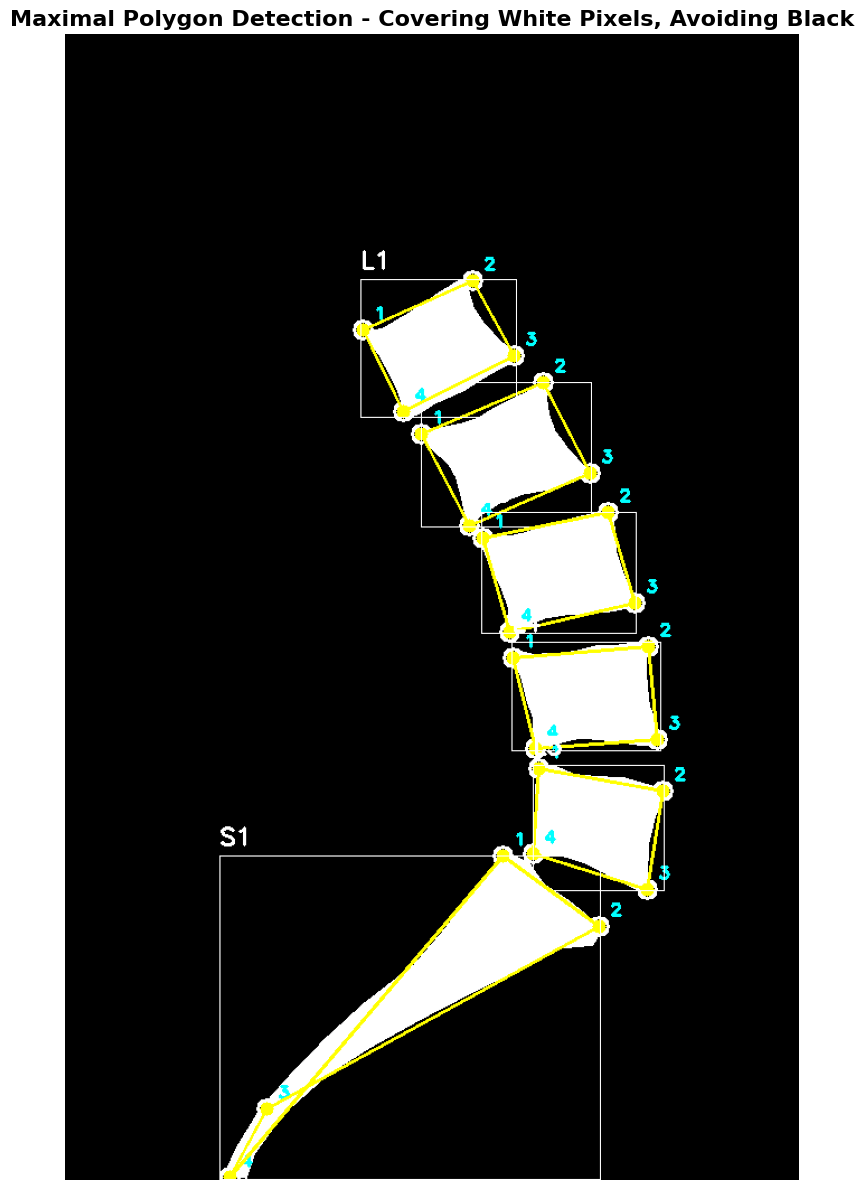


Result saved as: maximal_polygon_detection.png


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def detect_corners_maximal_polygon(binary_mask, step_size=2, min_distance=10):
    """
    Find the biggest polygon that covers white pixels without covering black pixels.
    Strategy: Start from convex hull and iteratively shrink edges inward until
    they touch black pixels or reach minimum distance.
    """
    # Find contours
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), 
                                     cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get convex hull as starting point (outer boundary)
    hull = cv2.convexHull(largest_contour)
    
    # Approximate to get initial 4 corners
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    
    # Adjust epsilon to get exactly 4 points if needed
    attempts = 0
    while len(approx) != 4 and attempts < 20:
        if len(approx) > 4:
            epsilon *= 1.1
        else:
            epsilon *= 0.9
        approx = cv2.approxPolyDP(hull, epsilon, True)
        attempts += 1
    
    if len(approx) != 4:
        return None
    
    corners = approx.reshape(4, 2).astype(float)
    
    # Order corners: top-left, top-right, bottom-right, bottom-left
    corners = order_corners(corners)
    
    # For each edge, move inward until we hit black pixels
    optimized_corners = corners.copy()
    
    for i in range(4):
        p1 = corners[i]
        p2 = corners[(i + 1) % 4]
        
        # Find the perpendicular inward direction
        edge_vector = p2 - p1
        edge_length = np.linalg.norm(edge_vector)
        edge_normal = np.array([-edge_vector[1], edge_vector[0]]) / edge_length
        
        # Determine inward direction (towards centroid)
        centroid = np.mean(corners, axis=0)
        edge_midpoint = (p1 + p2) / 2
        to_centroid = centroid - edge_midpoint
        if np.dot(edge_normal, to_centroid) < 0:
            edge_normal = -edge_normal
        
        # Move edge inward step by step
        max_inward_distance = 0
        for distance in np.arange(0, min(binary_mask.shape) / 3, step_size):
            # Sample points along the edge at this distance
            sample_points = []
            num_samples = max(3, int(edge_length / 5))
            
            for t in np.linspace(0, 1, num_samples):
                point_on_edge = p1 + t * (p2 - p1)
                moved_point = point_on_edge + edge_normal * distance
                sample_points.append(moved_point)
            
            # Check if all sample points are still on white pixels
            all_white = True
            for pt in sample_points:
                x, y = int(pt[0]), int(pt[1])
                if x < 0 or x >= binary_mask.shape[1] or y < 0 or y >= binary_mask.shape[0]:
                    all_white = False
                    break
                if binary_mask[y, x] == 0:  # Black pixel
                    all_white = False
                    break
            
            if all_white:
                max_inward_distance = distance
            else:
                break  # Stop when we hit black pixels
        
        # Move both corners of this edge inward by the maximum safe distance
        optimized_corners[i] += edge_normal * max_inward_distance
        optimized_corners[(i + 1) % 4] += edge_normal * max_inward_distance
    
    # Average out the corner adjustments (since each corner is adjusted by two edges)
    final_corners = np.zeros_like(corners)
    for i in range(4):
        final_corners[i] = optimized_corners[i]
    
    return final_corners

def order_corners(corners):
    """Order corners as: top-left, top-right, bottom-right, bottom-left"""
    # Sort by y-coordinate
    sorted_by_y = corners[np.argsort(corners[:, 1])]
    
    # Top two points
    top_points = sorted_by_y[:2]
    top_points = top_points[np.argsort(top_points[:, 0])]  # Sort by x
    
    # Bottom two points
    bottom_points = sorted_by_y[2:]
    bottom_points = bottom_points[np.argsort(bottom_points[:, 0])]  # Sort by x
    
    return np.vstack([top_points, bottom_points[::-1]])


# Load image and model
image_path = "sam_data3/train/masks/211957-N_jpg.rf.853283ab4889c30b68778e3906e4159b.png"
model_path = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/detect/train3/weights/best.pt"

image = cv2.imread(image_path)
model = YOLO(model_path)
results = model(image, verbose=False)

# Convert to binary
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Class names mapping
vertebra_classes = {
    0: 'l1',
    1: 'l2',
    2: 'l3',
    3: 'l4',
    4: 'l5',
    5: 's1'
}

# Color for corners and lines
corner_color = (0, 255, 255)  # Cyan

# Create result image
result_image = image.copy()

print("\n" + "="*60)
print("Maximal Polygon Detection (covering white, avoiding black)")
print("="*60)

# Process each detected vertebra
for box in results[0].boxes:
    cls_id = int(box.cls)
    
    if cls_id in vertebra_classes:
        vertebra_name = vertebra_classes[cls_id]
        
        # Get bounding box coordinates
        box_coords = list(map(int, box.xyxy[0].cpu().numpy()))
        x1, y1, x2, y2 = box_coords
        
        # Extract mask region
        mask = binary_image[y1:y2, x1:x2]
        
        try:
            corners = detect_corners_maximal_polygon(mask, step_size=1, min_distance=5)
            
            if corners is not None:
                # Convert to absolute coordinates
                corners_abs = corners.copy()
                corners_abs[:, 0] += x1
                corners_abs[:, 1] += y1
                
                # Draw corners
                for i, corner in enumerate(corners_abs):
                    x, y = int(corner[0]), int(corner[1])
                    cv2.circle(result_image, (x, y), 6, corner_color, -1)
                    cv2.circle(result_image, (x, y), 8, (255, 255, 255), 2)
                    # Label corners
                    cv2.putText(result_image, str(i+1), (x+10, y-10), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
                
                # Draw lines connecting corners
                for i in range(4):
                    pt1 = tuple(corners_abs[i].astype(int))
                    pt2 = tuple(corners_abs[(i+1)%4].astype(int))
                    cv2.line(result_image, pt1, pt2, corner_color, 2)
                
                print(f"  {vertebra_name.upper()}: ✓ Success - Maximal polygon found")
            else:
                print(f"  {vertebra_name.upper()}: ✗ Failed to find polygon")
                
        except Exception as e:
            print(f"  {vertebra_name.upper()}: ✗ Error - {e}")
        
        # Draw bounding box and label
        cv2.rectangle(result_image, (x1, y1), (x2, y2), (255, 255, 255), 1)
        cv2.putText(result_image, vertebra_name.upper(), (x1, y1-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Display
plt.figure(figsize=(15, 12))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Maximal Polygon Detection - Covering White Pixels, Avoiding Black', 
         fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Save result
cv2.imwrite('maximal_polygon_detection.png', result_image)
print("\n" + "="*60)
print("Result saved as: maximal_polygon_detection.png")
print("="*60)

In [4]:
new_pairs

{('l1', 'l2'): {'Back Points': ((426, 178), (434, 213)),
  'Abdominal Points': ((505, 150), (522, 168))},
 ('l2', 'l3'): {'Back Points': ((472, 274), (469, 303)),
  'Abdominal Points': ((557, 235), (575, 261))},
 ('l3', 'l4'): {'Back Points': ((507, 363), (513, 394)),
  'Abdominal Points': ((609, 336), (614, 375))},
 ('l4', 'l5'): {'Back Points': ((531, 457), (501, 499)),
  'Abdominal Points': ((637, 449), (601, 494))},
 ('l5', 's1'): {'Back Points': ((501, 555), (455, 597)),
  'Abdominal Points': ((614, 575), (556, 582))}}

In [ ]:
Pairs

In [8]:
vertebra_data_transformed['l1']['box_coordinates']

# [166, 165, 288, 281]
# Convert to 4 corners
box = vertebra_data_transformed['l1']['box_coordinates']
converted_corners = np.array([
    [box[0], box[1]],  # top-left
    [box[2], box[1]],  # top-right
    [box[2], box[3]],  # bottom-right
    [box[0], box[3]]   # bottom-left
])
converted_corners

array([[166, 165],
       [288, 165],
       [288, 281],
       [166, 281]])

Original source:
[[234 165]
 [288 218]
 [216 281]
 [166 222]]

Target:
[[166 165]
 [288 165]
 [288 281]
 [166 281]]

Optimal assignment (source index -> target index):
[(0, 1), (1, 2), (2, 3), (3, 0)]

Reordered source (matches target positions):
[[234 165]
 [288 218]
 [216 281]
 [166 222]]

Total distance moved:
224.0


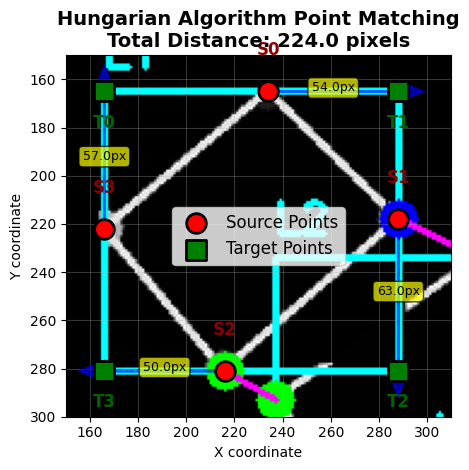

Optimal assignment: [(0, 1), (1, 2), (2, 3), (3, 0)]
Total distance: 224.0 pixels


In [13]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Your points
source = np.array([[234, 165], [288, 218], [216, 281], [166, 222]], dtype=np.int32)
target = np.array([[166, 165], [288, 165], [288, 281], [166, 281]])

# Step 1: Create cost matrix (Euclidean distances)
cost_matrix = np.zeros((len(source), len(target)))
for i in range(len(source)):
    for j in range(len(target)):
        # Euclidean distance
        cost_matrix[i, j] = np.sqrt(np.sum((source[i] - target[j])**2))

# Step 2: Apply Hungarian Algorithm
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Step 3: Reorder source points according to optimal assignment
reordered_source = source[row_ind]

print("Original source:")
print(source)
print("\nTarget:")
print(target)
print("\nOptimal assignment (source index -> target index):")
print(list(zip(row_ind, col_ind)))
print("\nReordered source (matches target positions):")
print(reordered_source)
print("\nTotal distance moved:")
print(cost_matrix[row_ind, col_ind].sum())


# If you have an image, load and display it first:
# img = plt.imread('your_image.jpg')
# plt.imshow(img)

plt.imshow(aligned_img)

# Plot source points (red)
plt.scatter(source[:, 0], source[:, 1], c='red', s=200, marker='o', 
            label='Source Points', zorder=5, edgecolors='black', linewidths=2)

# Plot target points (green)
plt.scatter(target[:, 0], target[:, 1], c='green', s=200, marker='s', 
            label='Target Points', zorder=5, edgecolors='black', linewidths=2)

# Draw arrows showing the optimal assignment
for src_idx, tgt_idx in zip(row_ind, col_ind):
    plt.arrow(source[src_idx, 0], source[src_idx, 1],
              target[tgt_idx, 0] - source[src_idx, 0],
              target[tgt_idx, 1] - source[src_idx, 1],
              head_width=8, head_length=10, fc='blue', ec='blue', 
              alpha=0.6, linewidth=2, zorder=3)
    
    # Add distance labels
    mid_x = (source[src_idx, 0] + target[tgt_idx, 0]) / 2
    mid_y = (source[src_idx, 1] + target[tgt_idx, 1]) / 2
    dist = cost_matrix[src_idx, tgt_idx]
    plt.text(mid_x, mid_y, f'{dist:.1f}px', 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
             fontsize=9, ha='center')

# Add point labels
for i, (x, y) in enumerate(source):
    plt.text(x, y-15, f'S{i}', fontsize=12, ha='center', 
             fontweight='bold', color='darkred')
for i, (x, y) in enumerate(target):
    plt.text(x, y+15, f'T{i}', fontsize=12, ha='center', 
             fontweight='bold', color='darkgreen')

plt.legend(fontsize=12)
plt.title(f'Hungarian Algorithm Point Matching\nTotal Distance: {cost_matrix[row_ind, col_ind].sum():.1f} pixels', 
          fontsize=14, fontweight='bold')
plt.xlim(150, 310)  # Adjust these values
plt.ylim(300, 150)  # Remember Y is inverted

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Optimal assignment: {list(zip(row_ind, col_ind))}")
print(f"Total distance: {cost_matrix[row_ind, col_ind].sum():.1f} pixels")

# Zoom in visualization 

In [6]:
vertebra_data_transformed['l1']['corners_absolute']


array([[234, 165],
       [288, 218],
       [216, 281],
       [166, 222]], dtype=int32)

In [ ]:
def calculate_slip_distance(data):
    """
    Calculate spondylolisthesis slip distance.
    
    Args:
        data: Dictionary with 'Abdominal Points' and 'Back Points'
              Each contains ((upper_x, upper_y), (lower_x, lower_y))
    
    Returns:
        dict: Contains slip_distance, ap_length, slip_percentage, and intersection_point
    """
    # Extract points
    abdominal_points = data['Abdominal Points']
    back_points = data['Back Points']
    
    # S1 (lower vertebra) superior endplate points
    s1_anterior = np.array(abdominal_points[1])  # (305, 631)
    s1_posterior = np.array(back_points[1])      # (386, 662)
    
    # L5 (upper vertebra) posterior corner
    l5_posterior = np.array(back_points[0])      # (419, 612)
    
    # Create infinite line through S1 superior endplate
    # Line direction vector
    s1_direction = s1_anterior - s1_posterior
    
    # Find perpendicular projection of L5 posterior onto S1 line
    # Using vector projection formula
    # Point on line closest to l5_posterior
    t = np.dot(l5_posterior - s1_posterior, s1_direction) / np.dot(s1_direction, s1_direction)
    intersection_point = s1_posterior + t * s1_direction
    
    # Calculate slip distance (from S1 posterior to intersection point)
    slip_distance = np.linalg.norm(intersection_point - s1_posterior)
    
    # Calculate AP length (full length of S1 superior surface)
    ap_length = np.linalg.norm(s1_anterior - s1_posterior)
    
    # Calculate slip percentage
    slip_percentage = (slip_distance / ap_length) * 100
    
    return {
        'slip_distance': slip_distance,
        'ap_length': ap_length,
        'slip_percentage': slip_percentage,
        'intersection_point': tuple(intersection_point),
        'l5_posterior': tuple(l5_posterior),
        's1_posterior': tuple(s1_posterior),
        's1_anterior': tuple(s1_anterior)
    }

# Example usage
data = {
    'Abdominal Points': ((309, 611), (305, 631)),
    'Back Points': ((419, 612), (386, 662))
}

result = calculate_slip_distance(data)

print(f"Slip Distance: {result['slip_distance']:.2f} pixels")
print(f"AP Length: {result['ap_length']:.2f} pixels")
print(f"Slip Percentage: {result['slip_percentage']:.2f}%")
print(f"Intersection Point: {result['intersection_point']}")
print(f"\nL5 Posterior Corner: {result['l5_posterior']}")
print(f"S1 Posterior Corner: {result['s1_posterior']}")
print(f"S1 Anterior Corner: {result['s1_anterior']}")

Slip Distance: 12.95 pixels
AP Length: 86.73 pixels
Slip Percentage: 14.93%
Intersection Point: (398.0929274129221, 666.6281574049455)

L5 Posterior Corner: (419, 612)
S1 Posterior Corner: (386, 662)
S1 Anterior Corner: (305, 631)


In [5]:
new_pairs

{('l1', 'l2'): {'Abdominal Points': ((128, 233), (128, 249)),
  'Back Points': ((224, 198), (235, 215))},
 ('l2', 'l3'): {'Abdominal Points': ((165, 317), (181, 320)),
  'Back Points': ((269, 265), (284, 278))},
 ('l3', 'l4'): {'Abdominal Points': ((226, 415), (249, 422)),
  'Back Points': ((323, 357), (360, 391))},
 ('l4', 'l5'): {'Abdominal Points': ((282, 512), (299, 537)),
  'Back Points': ((388, 471), (409, 527))},
 ('l5', 's1'): {'Abdominal Points': ((309, 611), (305, 631)),
  'Back Points': ((419, 612), (386, 662))}}

In [11]:
Pairs[('l5', 's1')]

[((295, 676), (302, 686)), ((415, 700), (399, 752))]

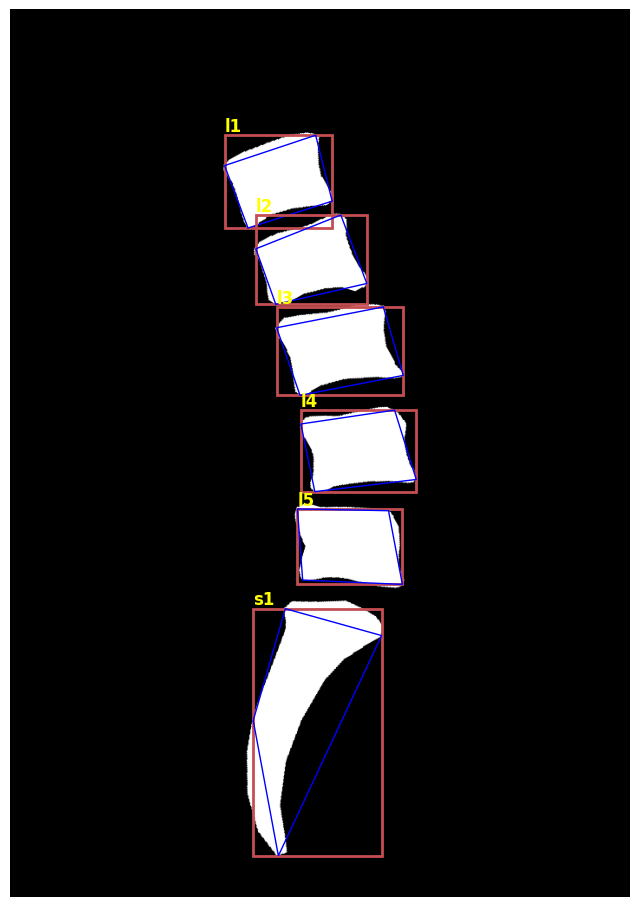

In [ ]:



# --- VISUAL VERIFICATION ---
fig, ax = plt.subplots(1, 1, figsize=(8, 12))
ax.imshow(aligned_img, cmap='gray')

for v_name, v_info in new_data.items():
    # Draw the new bounding box
    bbox = v_info['box_coordinates']
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Label it
    ax.text(bbox[0], bbox[1]-5, v_name, color='yellow', fontsize=12, weight='bold')
    
    # Draw the exact corners (to show rotation worked)
    corners = v_info['corners_absolute']
    poly = patches.Polygon(corners, closed=True, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(poly)

# Show the plot
plt.axis('off')
plt.show()

In [46]:
new_data

{'l1': {'corners_absolute': array([[ 52,  32],
         [101,  28],
         [106,  77],
         [ 56,  82]], dtype=int32),
  'box_coordinates': [52, 28, 106, 82],
  'corners': array([[ 0,  4],
         [49,  0],
         [54, 49],
         [ 4, 54]], dtype=int32)},
 'l2': {'corners_absolute': array([[ 62,  92],
         [112,  87],
         [117, 137],
         [ 67, 141]], dtype=int32),
  'box_coordinates': [62, 87, 117, 141],
  'corners': array([[ 0,  5],
         [50,  0],
         [55, 50],
         [ 5, 54]], dtype=int32)},
 'l3': {'corners_absolute': array([[ 73, 151],
         [123, 146],
         [128, 196],
         [ 78, 201]], dtype=int32),
  'box_coordinates': [73, 146, 128, 201],
  'corners': array([[ 0,  5],
         [50,  0],
         [55, 50],
         [ 5, 55]], dtype=int32)},
 'l4': {'corners_absolute': array([[ 77, 211],
         [127, 206],
         [131, 256],
         [ 82, 260]], dtype=int32),
  'box_coordinates': [77, 206, 131, 260],
  'corners': array([[ 0,  

In [15]:
%matplotlib inline

In [11]:
new_data

{'l3': {'box_coordinates': [232, 373, 360, 482],
  'corners': array([[100,   0],
         [128,  71],
         [ 26, 109],
         [  0,  34]], dtype=int32),
  'corners_absolute': array([[332, 373],
         [360, 444],
         [258, 482],
         [232, 407]], dtype=int32)},
 'l5': {'box_coordinates': [255, 582, 372, 668],
  'corners': array([[  0,   2],
         [107,   0],
         [117,  86],
         [  5,  72]], dtype=int32),
  'corners_absolute': array([[255, 584],
         [362, 582],
         [372, 668],
         [260, 654]], dtype=int32)},
 's1': {'box_coordinates': [188, 672, 352, 955],
  'corners': array([[164,   8],
         [  7, 283],
         [  0, 189],
         [ 62,   0]], dtype=int32),
  'corners_absolute': array([[352, 680],
         [195, 955],
         [188, 861],
         [250, 672]], dtype=int32)},
 'l2': {'box_coordinates': [183, 280, 317, 394],
  'corners': array([[ 94,   0],
         [134,  66],
         [ 37, 114],
         [  0,  46]], dtype=int32),
  'c

In [6]:
vertebra_data

{'l3': {'box_coordinates': [350, 349, 478, 452],
  'corners': array([[107,   2],
         [127,  75],
         [ 21, 102],
         [  3,  24]], dtype=int32),
  'corners_absolute': array([[457, 351],
         [477, 424],
         [371, 451],
         [353, 373]], dtype=int32)},
 'l5': {'box_coordinates': [351, 543, 467, 651],
  'corners': array([[  5,   8],
         [112,  18],
         [112, 105],
         [  2,  78]], dtype=int32),
  'corners_absolute': array([[356, 551],
         [463, 561],
         [463, 648],
         [353, 621]], dtype=int32)},
 's1': {'box_coordinates': [249, 630, 451, 929],
  'corners': array([[193,  28],
         [  6, 283],
         [ 10, 189],
         [ 92,   8]], dtype=int32),
  'corners_absolute': array([[442, 658],
         [255, 913],
         [259, 819],
         [341, 638]], dtype=int32)},
 'l2': {'box_coordinates': [312, 251, 446, 361],
  'corners': array([[101,   1],
         [133,  71],
         [ 31, 108],
         [  2,  36]], dtype=int32),
  'c

In [22]:


# Example usage:
l1_corners = np.array([[271, 205], [365, 163], [395, 226], [301, 266]])
l2_corners = np.array([[314, 287], [413, 252], [445, 322], [343, 359]])

corner_pairs = find_corner_pairs(l1_corners, l2_corners)

for i, (corner1, corner2) in enumerate(corner_pairs):
    dist = calculate_distance(corner1, corner2)
    print(f"Pair {i+1}: L1 Corner {corner1} <-> L2 Corner {corner2} (distance: {dist:.2f})")

Pair 1: L1 Corner [301 266] <-> L2 Corner [314 287] (distance: 24.70)
Pair 2: L1 Corner [395 226] <-> L2 Corner [413 252] (distance: 31.62)


In [23]:
corner_pairs

[(array([301, 266]), array([314, 287])),
 (array([395, 226]), array([413, 252]))]

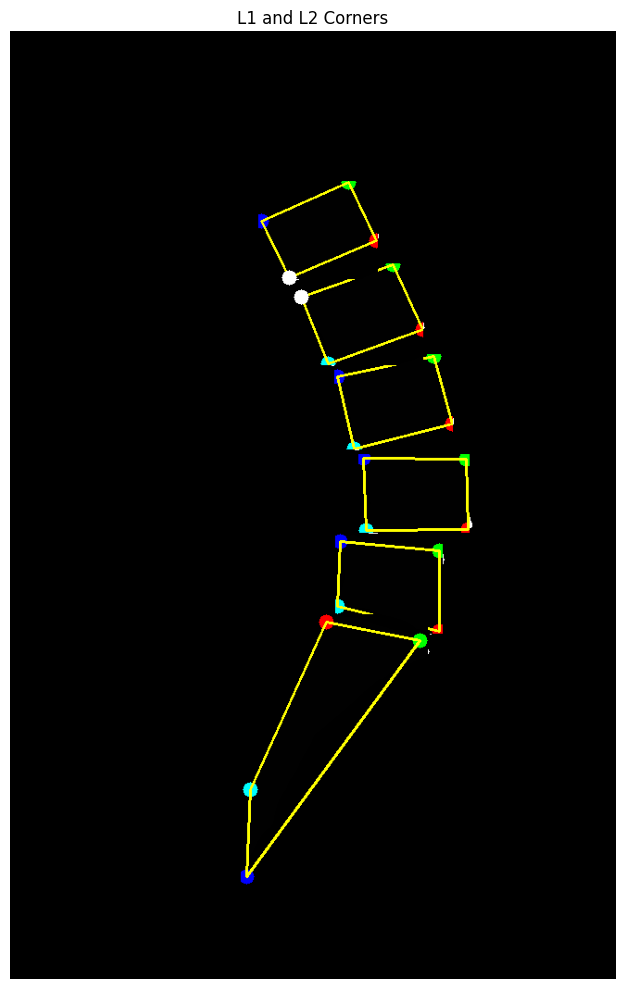

24.698178070456937


24.698178070456937

In [2]:
def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    print(np.linalg.norm(point1 - point2))
    return np.linalg.norm(point1 - point2)


l1_corners = np.array([[271, 205], [365, 163], [395, 226], [301, 266]])
l2_corners = np.array([[314, 287], [413, 252], [445, 322], [343, 359]])

# Draw the corners in white circles
# [271, 205] with [314, 287]
# Draw
cv2.circle(image, tuple(l1_corners[3].astype(int)), 8, (255, 255, 255), -1)  # White for L1 corner
cv2.circle(image, tuple(l2_corners[0].astype(int)), 8, (255, 255, 255), -1)  # White for L2 corner

# Show image with corners
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("L1 and L2 Corners")
plt.axis('off')
plt.tight_layout()
plt.show()


calculate_distance(l1_corners[3], l2_corners[0])

top left: [365 163]
top right: [395 226]
bottom right: [301 266]
bottom left: [271 205]


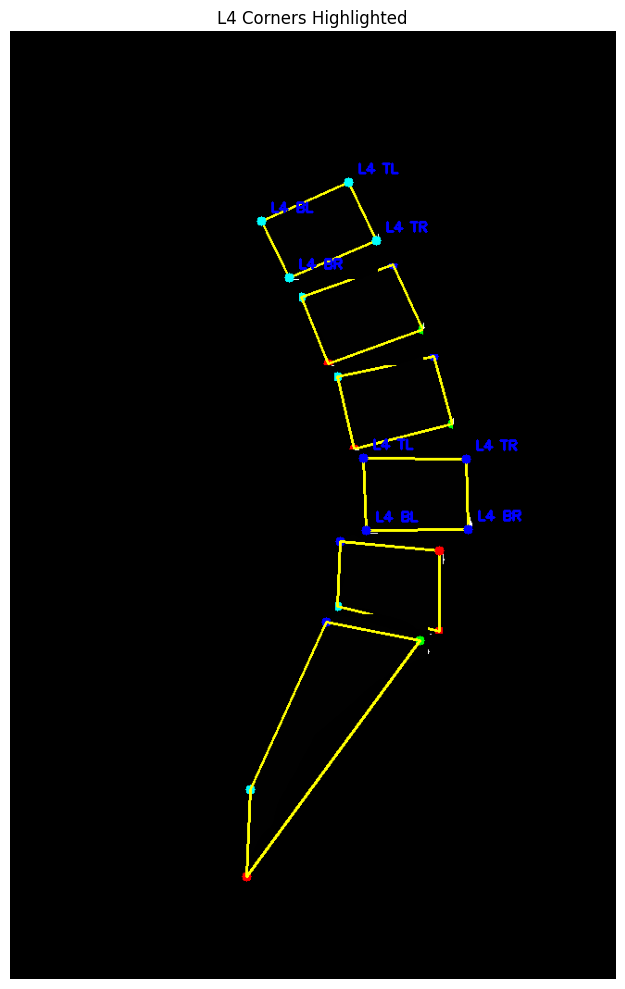

In [11]:
# l4 coordinates
if 'l1' in vertebra_data and vertebra_data['l1']['corners'] is not None:
    l4_corners = vertebra_data['l1']['corners_absolute']
    print(f"top left: {l4_corners[0]}")
    print(f"top right: {l4_corners[1]}")
    print(f"bottom right: {l4_corners[2]}")
    print(f"bottom left: {l4_corners[3]}")

    for i, corner in enumerate(l4_corners):
        x, y = int(corner[0]), int(corner[1])
        cv2.circle(image, (x, y), 5, (255, 255, 0), -1)  # Blue for L4 corners
        cv2.putText(image, f'L4 {["TL", "TR", "BR", "BL"][i]}', (x + 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("L4 Corners Highlighted")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [17]:
l3_box_coordinates
# get the first element from the map object
list(l3_box_coordinates)

[350, 349, 478, 452]

In [6]:
l2_box_coordinates

NameError: name 'l2_box_coordinates' is not defined

In [ ]:
/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/masks/52151-3-_jpg.rf.c6f09988dc0e15b57347abf759d005e3.png

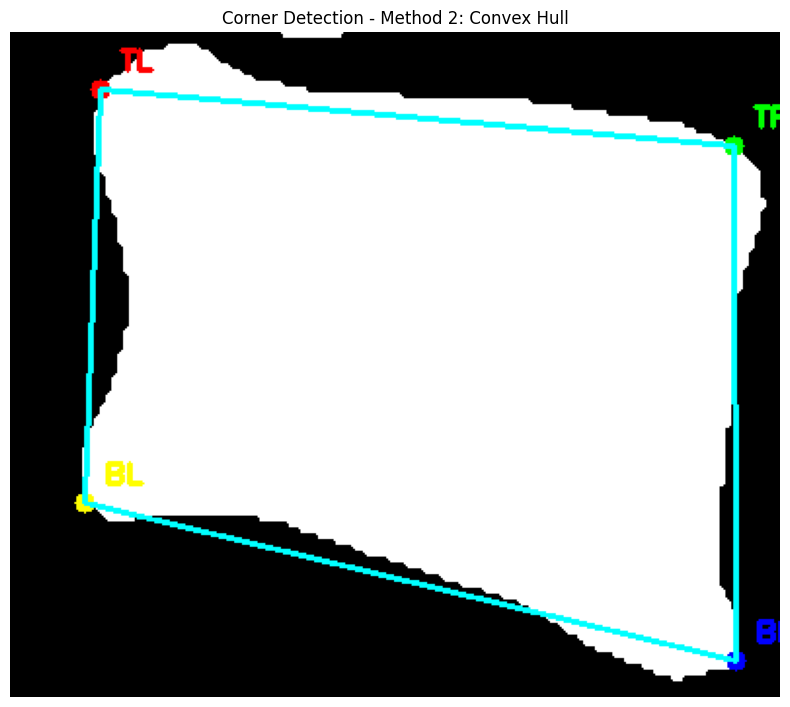


Method 2: Convex Hull Corners (x, y):
  TL: (46.0, 29.0)
  TR: (371.0, 58.0)
  BR: (372.0, 322.0)
  BL: (38.0, 241.0)


In [1]:
import os
import shutil
from pathlib import Path
import cv2
import numpy as np

class ImageClassifier:
    def __init__(self, source_dir):
        self.source_dir = Path(source_dir)
        self.base_dir = self.source_dir.parent
        self.clockwise_dir = self.base_dir / "Clock-wise"
        self.anticlockwise_dir = self.base_dir / "Anti-clock-wise"
        
        # Create output directories
        self.clockwise_dir.mkdir(exist_ok=True)
        self.anticlockwise_dir.mkdir(exist_ok=True)
        
        # Get all image files
        self.images = sorted([
            f for f in self.source_dir.glob("*")
            if f.suffix.lower() in ['.png', '.jpg', '.jpeg', '.bmp', '.tiff']
        ])
        
        self.current_idx = 0
        self.window_name = "Image Classifier"
        
    def display_image(self):
        if not self.images:
            print("No images found!")
            return False
            
        img_path = self.images[self.current_idx]
        img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
        
        if img is None:
            print(f"Failed to load: {img_path}")
            return False
        
        # Convert grayscale to BGR for display
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
        # Resize if too large
        h, w = img.shape[:2]
        max_dim = 800
        if max(h, w) > max_dim:
            scale = max_dim / max(h, w)
            img = cv2.resize(img, (int(w*scale), int(h*scale)))
        
        # Add info text
        info_img = np.zeros((100, img.shape[1], 3), dtype=np.uint8)
        cv2.putText(info_img, f"Image {self.current_idx + 1}/{len(self.images)}", 
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(info_img, f"File: {img_path.name}", 
                    (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), 1)
        cv2.putText(info_img, "C: Clockwise | A: Anti-clockwise | Left/Right: Navigate | Q: Quit", 
                    (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 150, 150), 1)
        
        # Combine
        display = np.vstack([info_img, img])
        cv2.imshow(self.window_name, display)
        return True
    
    def copy_image(self, destination):
        src = self.images[self.current_idx]
        dst = destination / src.name
        shutil.copy2(src, dst)
        print(f"Copied {src.name} to {destination.name}/")
    
    def run(self):
        if not self.images:
            print("No images found in the source directory!")
            return
        
        print(f"Found {len(self.images)} images")
        print("\nControls:")
        print("  C - Copy to Clock-wise folder")
        print("  A - Copy to Anti-clock-wise folder")
        print("  Right Arrow - Next image")
        print("  Left Arrow - Previous image")
        print("  Q - Quit\n")
        
        cv2.namedWindow(self.window_name, cv2.WINDOW_NORMAL)
        
        while True:
            if not self.display_image():
                break
            
            key = cv2.waitKey(0) & 0xFF
            
            # C key - Clockwise
            if key == ord('c') or key == ord('C'):
                self.copy_image(self.clockwise_dir)
                self.current_idx = (self.current_idx + 1) % len(self.images)
                
            # A key - Anti-clockwise
            elif key == ord('a') or key == ord('A'):
                self.copy_image(self.anticlockwise_dir)
                self.current_idx = (self.current_idx + 1) % len(self.images)
                
            # Right arrow - Next image
            elif key == 83 or key == ord('d') or key == ord('D'):
                self.current_idx = (self.current_idx + 1) % len(self.images)
                
            # Left arrow - Previous image
            elif key == 81 or key == ord('s') or key == ord('S'):
                self.current_idx = (self.current_idx - 1) % len(self.images)
                
            # Q key - Quit
            elif key == ord('q') or key == ord('Q') or key == 27:  # 27 is ESC
                break
        
        cv2.destroyAllWindows()
        print("\nClassification complete!")

if __name__ == "__main__":
    source_directory = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/masks"
    
    classifier = ImageClassifier(source_directory)
    classifier.run()

Found 1289 images

Controls:
  C - Copy to Clock-wise folder
  A - Copy to Anti-clock-wise folder
  Right Arrow - Next image
  Left Arrow - Previous image
  Q - Quit



QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread (0x39b6710).
Cannot move to target thread (0x397eeb0)

QObject::moveToThread: Current thread (0x397eeb0) is not the object's thread

Copied 1005683-N_jpg.rf.b21077abff3126e08ad1201b1e4d5a9f.png to Anti-clock-wise/
Copied 1006386-N_jpg.rf.af87ae5fa47b15631a491cc67a82a914.png to Clock-wise/
Copied 1008872-N_jpg.rf.87c991f7cc287aba9991ee5bfe64638d.png to Clock-wise/
Copied 1009623-N_jpg.rf.210295808d1e13d0bedcb698fc51e515.png to Clock-wise/
Copied 1011484_jpg.rf.29f48ff9e72b2b25bb2fc646a5da43bc.png to Clock-wise/
Copied 1011844-N_jpg.rf.1ddbb9705ef6def39e968e4bb885e654.png to Clock-wise/
Copied 1012625-2-_jpg.rf.3b8c53fd81f764e48ba7bb247e31a18a.png to Anti-clock-wise/
Copied 1013005-N_jpg.rf.be27ca3fe0cc141147e39bca54c81be0.png to Clock-wise/
Copied 1013418-N_jpg.rf.6dfd18fd64bec36fa3741b4c10afc31f.png to Clock-wise/
Copied 1013467-N_jpg.rf.549e7bfe35a52f19a68e89d8722560fb.png to Clock-wise/
Copied 1015158-N_jpg.rf.9e9f09e402071361d166d7293be98c9b.png to Anti-clock-wise/
Copied 1016460-N_jpg.rf.56db168a8d570f1fd4e91f105a51cfa1.png to Clock-wise/
Copied 1017670-N_jpg.rf.748d57072e5121b1876524ece395dbca.png to Clock-wise

In [3]:
import os
import random
from PIL import Image
from pathlib import Path

# Source and destination directories
src_dir = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/Clock-wise"
dst_dir = "/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/sam_data3/train/Clock-wise-flipped"

# Create destination directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# Get all image files from source directory
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
all_images = [f for f in os.listdir(src_dir) 
              if os.path.isfile(os.path.join(src_dir, f)) 
              and Path(f).suffix.lower() in image_extensions]

print(f"Found {len(all_images)} images in source directory")

# Randomly select 130 images
if len(all_images) < 130:
    print(f"Warning: Only {len(all_images)} images available, using all of them")
    selected_images = all_images
else:
    selected_images = random.sample(all_images, 130)

print(f"Selected {len(selected_images)} images for flipping")

# Process each selected image
for i, img_name in enumerate(selected_images, 1):
    try:
        # Open image
        img_path = os.path.join(src_dir, img_name)
        img = Image.open(img_path)
        
        # Flip vertically (top to bottom)
        # flipped_img = img.transpose(Image.FLIP_TOP_BOTTOM)

        # Flip horizontally (left to right)
        flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
        
        # Create new filename with '_flipped' suffix
        name_part, ext_part = os.path.splitext(img_name)
        new_name = f"{name_part}_flipped{ext_part}"
        
        # Save flipped image
        output_path = os.path.join(dst_dir, new_name)
        flipped_img.save(output_path)
        
        print(f"[{i}/{len(selected_images)}] Flipped and saved: {new_name}")
        
    except Exception as e:
        print(f"Error processing {img_name}: {str(e)}")

print(f"\nCompleted! {len(selected_images)} images flipped and saved to:")
print(dst_dir)

Found 193 images in source directory
Selected 130 images for flipping
[1/130] Flipped and saved: 1089498_jpg.rf.c5fba0bb1fb5515ecfe2baff4c816926_flipped.png
[2/130] Flipped and saved: 1091008-N_jpg.rf.24bc00d396ac72bd8c54fed0e75e399a_flipped.png
[3/130] Flipped and saved: 1059153-N_jpg.rf.77d8a31dcae62deb1bdad81feda4521e_flipped.png
[4/130] Flipped and saved: 1086073_jpg.rf.cb200605bdf3b638835f2dcf00aa29f5_flipped.png
[5/130] Flipped and saved: 1192232-N_jpg.rf.32a9b4932f8538a8a67c0030315f4654_flipped.png
[6/130] Flipped and saved: 1009623-N_jpg.rf.210295808d1e13d0bedcb698fc51e515_flipped.png
[7/130] Flipped and saved: 1096572_jpg.rf.5398af239c3b705c815c73691605940a_flipped.png
[8/130] Flipped and saved: 1067830-N_jpg.rf.1e5ded78d5b68924959c07ad88073d64_flipped.png
[9/130] Flipped and saved: 1083551-N_jpg.rf.71cc9dc4961fead3435d9fc72f1b7b81_flipped.png
[10/130] Flipped and saved: 1016460-N_jpg.rf.56db168a8d570f1fd4e91f105a51cfa1_flipped.png
[11/130] Flipped and saved: 1123576-3-_jpg.rf

The following code could be used to rotate the image based on PCA analysis of the largest contour in the mask image.

One issue, if the S1 not fully appearing in the image the image will be centered correctly but flipped upside down. To fix this, I think we should give the user the ability to do that manually. Or create a simple yolo function to detect the flipped images and correct them.


Not the user ya 7maaaar, since you have already the boxes, if any of the boxes is under the s1 box then flip the image. Easyyyy

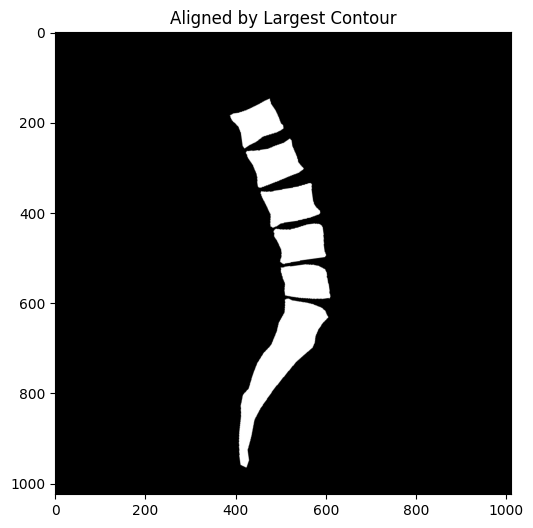

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_spinal_mask_contour(image_path):
    # 1. Load image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    
    # 2. Get coordinates for PCA
    y_idxs, x_idxs = np.nonzero(img)
    if len(y_idxs) == 0: return img
    coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)

    # 3. PCA Analysis
    mean, eigenvectors = cv2.PCACompute(coords, mean=None)
    center_x, center_y = mean[0, 0], mean[0, 1]
    
    # Calculate angle to align vertical
    angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    angle_deg = np.degrees(angle_rad)
    rotation_angle = angle_deg + 90 

    # 4. Rotation Matrix & Centering
    M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    img_center_x = w / 2
    img_center_y = h / 2
    M[0, 2] += (img_center_x - center_x)
    M[1, 2] += (img_center_y - center_y)

    # 5. Warp (Rotate)
    aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)

    # --- NEW STEP: ORIENTATION BY LARGEST CONTOUR ---
    # Find all contours in the new aligned image
    # Note: Using RETR_EXTERNAL to get only the outer shapes
    contours, _ = cv2.findContours(aligned_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # 1. Find the largest contour by area (S1 / L5)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # 2. Find the center of that specific contour
        M_contour = cv2.moments(largest_contour)
        if M_contour["m00"] != 0:
            cY = int(M_contour["m01"] / M_contour["m00"])
            
            # 3. Check if it is in the top half (0 to h/2)
            # If the "base" is in the top, the image is upside down.
            if cY < h / 2:
                aligned_img = cv2.rotate(aligned_img, cv2.ROTATE_180)
    # ------------------------------------------------

    return aligned_img

# Test
output = align_spinal_mask_contour('sam_data3/train/Clock-wise/1025491-N_jpg.rf.5be1a8f8353873f6c3603613923a642c.png')
plt.figure(figsize=(6,6))
plt.title("Aligned by Largest Contour")
plt.imshow(output, cmap='gray')
plt.show()

In [18]:
from ultralytics import YOLO
import cv2
import numpy as np

model = YOLO("yolov8m-cls.pt")

model.train(data="/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset", epochs=100, batch=16, imgsz=640, fliplr=0.0, patience=40)

New https://pypi.org/project/ultralytics/8.3.240 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 7967MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset, epochs=100, time=None, patience=40, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, v

E0000 00:00:1766136781.459823   15134 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766136781.463615   15134 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766136781.473702   15134 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766136781.473711   15134 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766136781.473712   15134 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766136781.473714   15134 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=1000 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   2655744  ultralyti

train: Scanning /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset/train... 265 images, 0 corrupt: 100%|██████████| 265/265 [00:00<00:00, 9454.67it/s]

train: New cache created: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset/train.cache



val: Scanning /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset/val... 77 images, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 7286.54it/s]

val: New cache created: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/classify/train7
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      4.38G     0.6071          9        640: 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      5.41G     0.3206          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      5.42G     0.1388          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      5.42G    0.05421          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      5.42G    0.08683          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all      0.636          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      5.42G     0.1107          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      5.42G     0.1583          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all      0.675          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      5.42G     0.1381          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]

                   all      0.753          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      5.42G     0.1222          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      5.42G     0.0915          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      5.42G    0.07049          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      5.42G     0.0291          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      5.42G    0.05503          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      5.42G    0.07274          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all      0.909          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      5.42G    0.05196          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      5.42G     0.0712          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      5.42G     0.1327          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      5.42G    0.08487          9        640: 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      5.42G    0.03442          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      5.42G    0.06257          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      5.42G    0.07086          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      5.42G    0.03742          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      5.42G    0.05264          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      5.42G    0.03355          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      5.42G    0.03257          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      5.42G    0.04675          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      5.42G    0.02113          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      5.42G    0.02798          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      5.42G    0.02649          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      5.42G    0.02967          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      5.42G    0.02474          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      5.42G    0.01962          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      5.42G     0.0353          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      5.42G    0.02308          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      5.42G    0.04225          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      5.42G    0.02754          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      5.42G     0.0433          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      5.42G    0.06512          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      5.42G    0.02742          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      5.42G    0.03068          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      5.42G    0.01644          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      5.42G    0.03582          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      5.42G    0.02366          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      5.42G     0.0279          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      5.42G    0.03658          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      5.42G    0.02412          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      5.42G    0.02344          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      5.42G    0.03116          9        640: 100%|██████████| 17/17 [00:03<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      5.42G    0.02532          9        640: 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      5.42G    0.01561          9        640: 100%|██████████| 17/17 [00:04<00:00,  4.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all          1          1
EarlyStopping: Training stopped early as no improvement observed in last 40 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=40) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

50 epochs completed in 0.086 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 31.7MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 7967MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
train: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/Classification Dataset/train... found 265 images in 2 classes ✅ 
val: /home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Musc

               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]


                   all          1          1
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f501cdec670>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train7')
speed: {'preprocess': 0.4281464935047552, 'inference': 3.9493534545431723, 'loss': 0.0004245584341924178, 'postprocess': 0.0009941818166521149}
task: 'classify'
top1: 1.0
top5: 1.0

In [87]:
from ultralytics import YOLO
import cv2

model = YOLO("/home/yousof/Fine-Tuning-SAM2-UNet-for-Breast-Image-Segmentation-Without-Pectoral-Muscle-and-Artifacts/runs/classify/train7/weights/best.pt")

image = cv2.imread("sam_data3/train/masks/1207048_jpg.rf.dbd94a2bfad41c4c37de3bd3ea087006.png")


img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = img.shape

# --- PCA Logic ---
y_idxs, x_idxs = np.nonzero(img)
coords = np.vstack([x_idxs, y_idxs]).T.astype(np.float32)
mean, eigenvectors = cv2.PCACompute(coords, mean=None)
center_x, center_y = mean[0, 0], mean[0, 1]

angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
rotation_angle = np.degrees(angle_rad) + 90 

# --- Matrix Calculation ---
M = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
M[0, 2] += (w/2 - center_x)
M[1, 2] += (h/2 - center_y)

# Warp
aligned_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)


results = model(aligned_img)



0: 640x640 Right 0.77, Left 0.23, 11.6ms
Speed: 16.3ms preprocess, 11.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


In [88]:
results[0].probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.2272, 0.7728], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(0.7728, device='cuda:0')
top5: [1, 0]
top5conf: tensor([0.7728, 0.2272], device='cuda:0')

In [89]:
results[0].names

{0: 'Left', 1: 'Right'}

In [ ]:
results[0].probs.top1

1

In [2]:
import re

text = """
[4/3726] 1008872-N_jpg.rf.3ad89b240d34baaa52ee3bc623999246.jpg | IoU: 0.5874 | Dice: 0.6356
[5/3726] 1008872-N_jpg.rf.ca07bef964b5503ee1dd4ef9577776e7.jpg | IoU: 0.5914 | Dice: 0.6375
[6/3726] 1008872-N_jpg.rf.eb35d166bccd09575d483193f8ad3b16.jpg | IoU: 0.5852 | Dice: 0.6338
[329/3726] 1117597-2-_jpg.rf.bd771773eeb0126599bd25254ff3ee05.jpg | IoU: 0.8446 | Dice: 0.9128
[595/3726] 1183610-N_jpg.rf.1c36e153d7ef434398fa16ee93a68739.jpg | IoU: 0.7443 | Dice: 0.7955
[596/3726] 1183610-N_jpg.rf.da8c049bd7d0203859a9d226e7616217.jpg | IoU: 0.7674 | Dice: 0.8088
[597/3726] 1183610-N_jpg.rf.e75c264634664510070497cde59c3638.jpg | IoU: 0.7669 | Dice: 0.8087
[850/3726] 1207449-N_jpg.rf.1cb52c8b239062497db6cd57afdd6a63.jpg | IoU: 0.8459 | Dice: 0.9129
[904/3726] 1211345-N_jpg.rf.37b6d6f595ba36ca1549b9d5f8c4c8bf.jpg | IoU: 0.7688 | Dice: 0.8103
[905/3726] 1211345-N_jpg.rf.86518c7f9a65bb7afa655b8bcb3f4cde.jpg | IoU: 0.7763 | Dice: 0.8144
[906/3726] 1211345-N_jpg.rf.8ba54d2e51afbcac3a813eeb819c7efe.jpg | IoU: 0.7861 | Dice: 0.8198
[1282/3726] 12801124_jpg.rf.37c015ce069d89920a829d65d35feb30.jpg | IoU: 0.8294 | Dice: 0.9052
[1283/3726] 12801124_jpg.rf.a167c86cb5b7e8fb8e06a7f01c1ba4b7.jpg | IoU: 0.8401 | Dice: 0.9114
[1284/3726] 12801124_jpg.rf.ea0048f7fc69fed76273667d47cf87c9.jpg | IoU: 0.8457 | Dice: 0.9150
[1292/3726] 1284527_jpg.rf.d24022a78fb79dea622532aac15d9996.jpg | IoU: 0.8312 | Dice: 0.9047
[1293/3726] 1284527_jpg.rf.de58c8faca66443d40d407d3c22be2da.jpg | IoU: 0.8382 | Dice: 0.9082
[1348/3726] 157380-N_jpg.rf.9134ab194199936ed08975a19d9a2011.jpg | IoU: 0.8387 | Dice: 0.9092
[1373/3726] 170330-2-_jpg.rf.7f60331a6af3548873193c31fc745e79.jpg | IoU: 0.8394 | Dice: 0.9091
[1661/3726] 284723-N-2-_jpg.rf.7fb39ad954c80b5219f738acc2fca323.jpg | IoU: 0.8429 | Dice: 0.9071
[1663/3726] 284723-N_jpg.rf.00537032d43c804d2b9bd52322cb6abd.jpg | IoU: 0.7809 | Dice: 0.8698
[1664/3726] 284723-N_jpg.rf.2caf0608ab55bef80281caa720f3c36f.jpg | IoU: 0.8221 | Dice: 0.8972
[1978/3726] 404749_jpg.rf.51a3eb15aa10f851a9c96e6d43df668f.jpg | IoU: 0.8493 | Dice: 0.9172
[1980/3726] 404749_jpg.rf.a717872c82c53840d9fd3e4e8493bf42.jpg | IoU: 0.8477 | Dice: 0.9162
[2070/3726] 449201_jpg.rf.dbf55d186e62cee9366f1a1116b7909c.jpg | IoU: 0.8446 | Dice: 0.9143
[2134/3726] 475241_jpg.rf.307b183bd9717dc40c74a9edd58c4319.jpg | IoU: 0.8246 | Dice: 0.9022
[2135/3726] 475241_jpg.rf.7dbd335c728cfff295ef0a47829b46cf.jpg | IoU: 0.8401 | Dice: 0.9116
[2136/3726] 475241_jpg.rf.f199d0e3aee6dd0a381d02dca455e92d.jpg | IoU: 0.8360 | Dice: 0.9089
[2381/3726] 577320_jpg.rf.6c1e8e83c67e3d5da462c557faf5b45e.jpg | IoU: 0.8349 | Dice: 0.9086
[2446/3726] 597964-N_jpg.rf.132c8aa0768fc39fe004ae39afd73bf9.jpg | IoU: 0.7278 | Dice: 0.7772
[2447/3726] 597964-N_jpg.rf.49a09c4cfc629d13604dfd3b68d0fa38.jpg | IoU: 0.7219 | Dice: 0.7737
[2448/3726] 597964-N_jpg.rf.b40bc31ca652d091c19e0138b9b1863d.jpg | IoU: 0.7308 | Dice: 0.7790
[2543/3726] 625042-N_jpg.rf.2821e07654cba898378f8831e398cd4f.jpg | IoU: 0.8113 | Dice: 0.8335
[2764/3726] 703376-1-_jpg.rf.03962dbb1eec2a6d9c334743d9e0e42e.jpg | IoU: 0.8461 | Dice: 0.9149
[3069/3726] 798020-N_jpg.rf.bec182688f764d819941444befad8d6a.jpg | IoU: 0.7572 | Dice: 0.7927
"""

pattern = re.compile(
    r"\]\s+(\d+)[^-]*.*?\|\s+IoU:\s+([\d.]+)\s+\|\s+Dice:\s+([\d.]+)"
)

records = []

for line in text.splitlines():
    match = pattern.search(line)
    if match:
        image_id = int(match.group(1))
        iou = float(match.group(2))
        dice = float(match.group(3))
        records.append((image_id, iou, dice))

# Sort by IoU (ascending)
records.sort(key=lambda x: x[1])

# Print results
for image_id, iou, dice in records:
    print(f"Image ID: {image_id}, IoU: {iou:.4f}, Dice: {dice:.4f}")


Image ID: 1008872, IoU: 0.5852, Dice: 0.6338
Image ID: 1008872, IoU: 0.5874, Dice: 0.6356
Image ID: 1008872, IoU: 0.5914, Dice: 0.6375
Image ID: 597964, IoU: 0.7219, Dice: 0.7737
Image ID: 597964, IoU: 0.7278, Dice: 0.7772
Image ID: 597964, IoU: 0.7308, Dice: 0.7790
Image ID: 1183610, IoU: 0.7443, Dice: 0.7955
Image ID: 798020, IoU: 0.7572, Dice: 0.7927
Image ID: 1183610, IoU: 0.7669, Dice: 0.8087
Image ID: 1183610, IoU: 0.7674, Dice: 0.8088
Image ID: 1211345, IoU: 0.7688, Dice: 0.8103
Image ID: 1211345, IoU: 0.7763, Dice: 0.8144
Image ID: 284723, IoU: 0.7809, Dice: 0.8698
Image ID: 1211345, IoU: 0.7861, Dice: 0.8198
Image ID: 625042, IoU: 0.8113, Dice: 0.8335
Image ID: 284723, IoU: 0.8221, Dice: 0.8972
Image ID: 475241, IoU: 0.8246, Dice: 0.9022
Image ID: 12801124, IoU: 0.8294, Dice: 0.9052
Image ID: 1284527, IoU: 0.8312, Dice: 0.9047
Image ID: 577320, IoU: 0.8349, Dice: 0.9086
Image ID: 475241, IoU: 0.8360, Dice: 0.9089
Image ID: 1284527, IoU: 0.8382, Dice: 0.9082
Image ID: 157380, I

In [4]:
import time 

x = 1766563299.3324327

time.ctime(x)

# time difference


'Wed Dec 24 11:01:39 2025'

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="ET5vzMsPJyam3aJGDjJf")
project = rf.workspace("spondylothesis").project("spond-new-data-a9wzv")
version = project.version(1)
dataset = version.download("coco")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to spond-new-data--1 in coco:: 100%|██████████| 373/373 [00:00<00:00, 7259.65it/s]
